# Clustering Neighborhoods in Pittsburgh for Pharmacy Location Intelligence

This is a project for my IBM Data Science Capstone on Coursera.

### Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 2>

1. <a href="#item1">Introduction</a>

    
2. <a href="#item2">Data Collection and Preparation</a>

    
3. <a href="#item3">Methodology</a>


4. <a href="#item4">Analysis</a>


5. <a href="#item5">Results and Discussion</a>


6. <a href="#item6">Conclusion</a> 
    

</font>
</div>

# 1. Introduction

### 1.1 Background

The importance of Pharmacies in neighborhoods cannot be over emphasized. About 70% of Americans are on at least one prescription drug and over 50% of Americans are on at least two prescription drugs. In some communities, Pharmacists may be the sole source of clinical advice to the people. 

Some experts argue that, given the widening scope of services many pharmacies are providing, including physicals, immunizations, drug counseling, sexually transmitted infection screening, other laboratory testing and even access to naloxone, the medication used to reverse opioid overdose. Pharmacies are increasingly important pieces of the national conversation around health care.

This project will focus on clustering pittsburgh neighborhoods for pharmacy location intelligence. I will be using the Foursquare API for location data. I will perform data mining and data preparation using required libraries such as pandas, numpy etc. I will segment and cluster neighborhoods using the k-means algorithm. The folium library will be used to visualize the neighborhoods and their respective clusters.

### 1.2 Business Problem

Pittsburgh is a city in the state of Pennsylvania with a population of about 302,407(2018) and is the county seat of Allegheny. Allegheny County historically has been one of the oldest counties in the US. This emphasizes one of the importance of pharmacy in the county's neighborhood. Most seniors who have healthcare needs such as refilling their prescription may not have the opportunity of driving miles which in effect may cause them not taking their medications consistently. 

In some areas where there is demonstrable need for access to naloxone, pharmacy closures or lack thereof can frustrate treatment. A research conducted in Cook county, Illinois shows that community areas where opioid-related deaths are higher than the Chicago average are in areas where as at 2017 has one or fewer active pharmacies. Dima Qato in one of his publication said “A lot of public attention focuses on insurance, but that’s not enough, even if medications are affordable, if the pharmacy isn’t accessible, they're not accessible.”

### 1.3 Interest
This project will be of interest to independent pharmacies, chain store pharmacies, the city of Pittsburgh, and other healthcare stakeholders

##### Importing all dependencies

In [2]:
import pandas as pd #library to handle data analysis

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import csv

import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from bs4 import BeautifulSoup

import requests

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as plt
%matplotlib inline

mpl.style.use('ggplot')

import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('libraries imported')

libraries imported


# 2. Data Collection and Preparation

### 2.1 Data Collection

I will be using the Foursquare location data for my clustering analysis. In addition to the foursquare data I will perform webscraping 'Rxlist' to source for the addresses and list of Pharmacies in Pittsburgh area for mapping purpose. Pittsburgh census data from Data.gov by zip codes and list of overdose in pttsburgh (2017) by zip codes will also be used in this project.

### 2.2 Data Preparation

I experienced some issues in the area of data preparation and cleaning. A lot of Data enginerring had to be done to transform data from various sources into usable dataframe. One of the issue experienced is that some data are available at the county level. Which mean I had to trim them down to the Pittsburgh city level.
Also, the Foursquare API location data for pittsburgh has more information at the zipcode level rather than neighborhood level. This made my analysis to be done at the Zip code level of detail.

#### 2.2.1 Loading pittsburgh zip codes data
I already downloaded the zip codes file from the web at 'zipcodes.com' and have it saved on my local file. Now let's read the file start our data cleaning

In [3]:
path=r'C:\Users\Olawale\Desktop\IBM Data Science\Pittsburgh Zip and Population.csv'
ppitt_geodata=pd.read_csv(path, engine='python')

In [4]:
ppitt_geodata.head()

Zip      Type     County Population
0  15122  Standard  Allegheny     20,131
1  15201  Standard  Allegheny     12,713
2  15202  Standard  Allegheny     19,685
3  15203  Standard  Allegheny      9,949
4  15204  Standard  Allegheny      8,329

Looking through the data, we can see that some of the zip codes are with the type P.O Box address and Unique. Both codes are not relevant to our study. Let's perform some feature engineering to drop the unimportant zip codes and correct the valid zipcode

In [5]:
pitts_neborhood=ppitt_geodata.loc[ppitt_geodata['Type']==('Standard')]
pitts_neborhood=pitts_neborhood[pitts_neborhood['Population'] != '0']
pitts_neborhood

Zip      Type     County Population
0   15122  Standard  Allegheny     20,131
1   15201  Standard  Allegheny     12,713
2   15202  Standard  Allegheny     19,685
3   15203  Standard  Allegheny      9,949
4   15204  Standard  Allegheny      8,329
5   15205  Standard  Allegheny     21,865
6   15206  Standard  Allegheny     28,615
7   15207  Standard  Allegheny     11,268
8   15208  Standard  Allegheny     10,406
9   15209  Standard  Allegheny     12,438
10  15210  Standard  Allegheny     25,954
11  15211  Standard  Allegheny     11,081
12  15212  Standard  Allegheny     27,895
13  15213  Standard  Allegheny     30,844
14  15214  Standard  Allegheny     14,352
15  15215  Standard  Allegheny     12,615
16  15216  Standard  Allegheny     23,350
17  15217  Standard  Allegheny     27,220
18  15218  Standard  Allegheny     13,851
19  15219  Standard  Allegheny     16,696
20  15220  Standard  Allegheny     17,718
21  15221  Standard  Allegheny     31,060
22  15222  Standard  Allegheny      3,294
23  15223  Standard  Allegheny      7,236
24  15224  Standard  Allegheny     10,141
25  15225  Standard  Allegheny      1,084
26  15226  Standard  Allegheny     13,974
27  15227  Standard  Allegheny     28,156
28  15228  Standard  Allegheny     17,595
29  15229  Standard  Allegheny     13,825
32  15232  Standard  Allegheny     11,374
33  15233  Standard  Allegheny      4,451
34  15234  Standard  Allegheny     14,056
35  15235  Standard  Allegheny     34,580
36  15236  Standard  Allegheny     29,724
37  15237  Standard  Allegheny     41,895
38  15238  Standard  Allegheny     13,162
39  15239  Standard  Allegheny     21,024
41  15241  Standard  Allegheny     20,395
43  15243  Standard  Allegheny     13,406

In [6]:
locator = Nominatim(user_agent="pitts_explorer")

from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=2)
# 2- - create location column
pitts_neborhood['Neighborhood'] = pitts_neborhood['Zip'].apply(geocode)
# 3 - create longitude, latitude and altitude from location column (returns tuple)
pitts_neborhood['point'] = pitts_neborhood['Neighborhood'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
pitts_neborhood[['Zip Latitude', 'Zip Longitude', 'Zip Altitude']] = pd.DataFrame(pitts_neborhood['point'].tolist(), index=pitts_neborhood.index)

Let's view our geocoding result

In [7]:
pitts_neborhood

Zip      Type     County Population  \
0   15122  Standard  Allegheny     20,131   
1   15201  Standard  Allegheny     12,713   
2   15202  Standard  Allegheny     19,685   
3   15203  Standard  Allegheny      9,949   
4   15204  Standard  Allegheny      8,329   
5   15205  Standard  Allegheny     21,865   
6   15206  Standard  Allegheny     28,615   
7   15207  Standard  Allegheny     11,268   
8   15208  Standard  Allegheny     10,406   
9   15209  Standard  Allegheny     12,438   
10  15210  Standard  Allegheny     25,954   
11  15211  Standard  Allegheny     11,081   
12  15212  Standard  Allegheny     27,895   
13  15213  Standard  Allegheny     30,844   
14  15214  Standard  Allegheny     14,352   
15  15215  Standard  Allegheny     12,615   
16  15216  Standard  Allegheny     23,350   
17  15217  Standard  Allegheny     27,220   
18  15218  Standard  Allegheny     13,851   
19  15219  Standard  Allegheny     16,696   
20  15220  Standard  Allegheny     17,718   
21  15221  Standard  Allegheny     31,060   
22  15222  Standard  Allegheny      3,294   
23  15223  Standard  Allegheny      7,236   
24  15224  Standard  Allegheny     10,141   
25  15225  Standard  Allegheny      1,084   
26  15226  Standard  Allegheny     13,974   
27  15227  Standard  Allegheny     28,156   
28  15228  Standard  Allegheny     17,595   
29  15229  Standard  Allegheny     13,825   
32  15232  Standard  Allegheny     11,374   
33  15233  Standard  Allegheny      4,451   
34  15234  Standard  Allegheny     14,056   
35  15235  Standard  Allegheny     34,580   
36  15236  Standard  Allegheny     29,724   
37  15237  Standard  Allegheny     41,895   
38  15238  Standard  Allegheny     13,162   
39  15239  Standard  Allegheny     21,024   
41  15241  Standard  Allegheny     20,395   
43  15243  Standard  Allegheny     13,406   

                                         Neighborhood  \
0   (Μαρούσι, Δήμος Αμαρουσίου, Περιφερειακή Ενότη...   
1   (Central Lawrenceville, Pittsburgh, Allegheny ...   
2   (Avalon, Allegheny County, Pennsylvania, 15202...   
3   (South Side Flats, Pittsburgh, Allegheny Count...   
4   (Sheraden, Pittsburgh, Allegheny County, Penns...   
5   (Idlewood, Crafton, Allegheny County, Pennsylv...   
6   (Highland Park, Pittsburgh, Allegheny County, ...   
7   (Hazelwood, Pittsburgh, Allegheny County, Penn...   
8   (Homewood South, Pittsburgh, Allegheny County,...   
9   (Shaler Township, Allegheny County, Pennsylvan...   
10  (Mount Washington, Pittsburgh, Allegheny Count...   
11  (Mount Washington, Pittsburgh, Allegheny Count...   
12  (Perry South, Pittsburgh, Allegheny County, Pe...   
13  (South Oakland, Pittsburgh, Allegheny County, ...   
14  (Perry South, Pittsburgh, Allegheny County, Pe...   
15  (Muxía, Fisterra, A Coruña, Galicia / Galiza, ...   
16  (South Hills, Allegheny County, Pennsylvania, ...   
17  (Squirrel Hill South, Pittsburgh, Allegheny Co...   
18  (Swisshelm Park, Pittsburgh, Allegheny County,...   
19  (Downtown, Pittsburgh, Allegheny County, Penns...   
20  (Westwood, Pittsburgh, Allegheny County, Penns...   
21  (East Hills, Pittsburgh, Allegheny County, Pen...   
22  (Downtown, Pittsburgh, Allegheny County, Penns...   
23  (Troy Hill, Pittsburgh, Allegheny County, Penn...   
24  (Bloomfield, Pittsburgh, Allegheny County, Pen...   
25  (Neville Township, Allegheny County, Pennsylva...   
26  (Brookline, Pittsburgh, Allegheny County, Penn...   
27  (Brentwood, Allegheny County, Pennsylvania, 15...   
28  (Mount Lebanon, Allegheny County, Pennsylvania...   
29  (West View, Allegheny County, Pennsylvania, 15...   
32  (Shadyside, Pittsburgh, Allegheny County, Penn...   
33  (Δήμος Χαλανδρίου, Περιφερειακή Ενότητα Βορείο...   
34  (Overbrook, Pittsburgh, Allegheny County, Penn...   
35  (Verona Hills, Penn Hills, Allegheny County, P...   
36  (Curry, Allegheny County, Pennsylvania, 15236,...   
37  (Keown Station, Ross Township, Allegheny Count...   
38  (Mazaricos, O Xallas, A Coruña, Galicia / Gali.

Reviewing the table I can see that zipcodes 15122 15233 15215 and 15238 returned a wrong geocodes. Let's take another shot at generating the geocodes. This time let's create a new column 'Zip sate' and add PA to the zip codes.

In [8]:
wrongzips=pitts_neborhood.loc[[0, 15, 33, 38]]
wrongzips['State']="PA"
wrongzips['Zip State']=wrongzips['Zip'].astype(str)+", "+wrongzips['State']

In [9]:
wrongzips

Zip      Type     County Population  \
0   15122  Standard  Allegheny     20,131   
15  15215  Standard  Allegheny     12,615   
33  15233  Standard  Allegheny      4,451   
38  15238  Standard  Allegheny     13,162   

                                         Neighborhood  \
0   (Μαρούσι, Δήμος Αμαρουσίου, Περιφερειακή Ενότη...   
15  (Muxía, Fisterra, A Coruña, Galicia / Galiza, ...   
33  (Δήμος Χαλανδρίου, Περιφερειακή Ενότητα Βορείο...   
38  (Mazaricos, O Xallas, A Coruña, Galicia / Gali...   

                                            point  Zip Latitude  \
0     (38.05467204999999, 23.79821406174707, 0.0)     38.054672   
15     (43.0834523463537, -9.19670745458565, 0.0)     43.083452   
33   (38.024119616337714, 23.80020896421201, 0.0)     38.024120   
38  (42.905510037612935, -8.945423609871241, 0.0)     42.905510   

    Zip Longitude  Zip Altitude State  Zip State  
0       23.798214           0.0    PA  15122, PA  
15      -9.196707           0.0    PA  15215, PA  
33      23.800209           0.0    PA  15233, PA  
38      -8.945424           0.0    PA  15238, PA

In [10]:
locator = Nominatim(user_agent="pitts_explorer")

from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=2)
# 2- - create location column
wrongzips['Neighborhood'] = wrongzips['Zip State'].apply(geocode)
# 3 - create longitude, latitude and altitude from location column (returns tuple)
wrongzips['point'] = wrongzips['Neighborhood'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
wrongzips[['Zip Latitude', 'Zip Longitude', 'Zip Altitude']] = pd.DataFrame(wrongzips['point'].tolist(), index=wrongzips.index)

In [11]:
wrongzips=wrongzips.drop(['Zip State', 'State'], axis=1)

Dropping the wrong zips from pitts_neborhood dataframe and adding the corrected data to the data frame.

In [12]:
pitts_neborhood=pitts_neborhood.drop([0, 15, 33, 38], axis=0)
pitts_neborhood=pd.concat([pitts_neborhood, wrongzips], ignore_index=True)

C:\Users\Olawale\Anaconda3\Lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Let's drop unimportant columns to have a cleaner dataframe

In [13]:
pitts_neborhood=pitts_neborhood.drop(['Type', 'County','point', 'Zip Altitude'], axis=1)
pitts_neborhood=pitts_neborhood.reset_index()
pitts_neborhood=pitts_neborhood.drop(['index'], axis=1)

In [24]:
pitts_neborhood=pitts_neborhood.drop(['State'], axis=1)
pitts_neborhood

Neighborhood Population    Zip  \
0   (Central Lawrenceville, Pittsburgh, Allegheny ...     12,713  15201   
1   (Avalon, Allegheny County, Pennsylvania, 15202...     19,685  15202   
2   (South Side Flats, Pittsburgh, Allegheny Count...      9,949  15203   
3   (Sheraden, Pittsburgh, Allegheny County, Penns...      8,329  15204   
4   (Idlewood, Crafton, Allegheny County, Pennsylv...     21,865  15205   
5   (Highland Park, Pittsburgh, Allegheny County, ...     28,615  15206   
6   (Hazelwood, Pittsburgh, Allegheny County, Penn...     11,268  15207   
7   (Homewood South, Pittsburgh, Allegheny County,...     10,406  15208   
8   (Shaler Township, Allegheny County, Pennsylvan...     12,438  15209   
9   (Mount Washington, Pittsburgh, Allegheny Count...     25,954  15210   
10  (Mount Washington, Pittsburgh, Allegheny Count...     11,081  15211   
11  (Perry South, Pittsburgh, Allegheny County, Pe...     27,895  15212   
12  (South Oakland, Pittsburgh, Allegheny County, ...     30,844  15213   
13  (Perry South, Pittsburgh, Allegheny County, Pe...     14,352  15214   
14  (South Hills, Allegheny County, Pennsylvania, ...     23,350  15216   
15  (Squirrel Hill South, Pittsburgh, Allegheny Co...     27,220  15217   
16  (Swisshelm Park, Pittsburgh, Allegheny County,...     13,851  15218   
17  (Downtown, Pittsburgh, Allegheny County, Penns...     16,696  15219   
18  (Westwood, Pittsburgh, Allegheny County, Penns...     17,718  15220   
19  (East Hills, Pittsburgh, Allegheny County, Pen...     31,060  15221   
20  (Downtown, Pittsburgh, Allegheny County, Penns...      3,294  15222   
21  (Troy Hill, Pittsburgh, Allegheny County, Penn...      7,236  15223   
22  (Bloomfield, Pittsburgh, Allegheny County, Pen...     10,141  15224   
23  (Neville Township, Allegheny County, Pennsylva...      1,084  15225   
24  (Brookline, Pittsburgh, Allegheny County, Penn...     13,974  15226   
25  (Brentwood, Allegheny County, Pennsylvania, 15...     28,156  15227   
26  (Mount Lebanon, Allegheny County, Pennsylvania...     17,595  15228   
27  (West View, Allegheny County, Pennsylvania, 15...     13,825  15229   
28  (Shadyside, Pittsburgh, Allegheny County, Penn...     11,374  15232   
29  (Overbrook, Pittsburgh, Allegheny County, Penn...     14,056  15234   
30  (Verona Hills, Penn Hills, Allegheny County, P...     34,580  15235   
31  (Curry, Allegheny County, Pennsylvania, 15236,...     29,724  15236   
32  (Keown Station, Ross Township, Allegheny Count...     41,895  15237   
33  (Polish Hill, Pittsburgh, Allegheny County, Pe...     21,024  15239   
34  (Upper St. Clair, Allegheny County, Pennsylvan...     20,395  15241   
35  (Mount Lebanon, Allegheny County, Pennsylvania...     13,406  15243   
36  (Terrace, West Mifflin, Allegheny County, Penn...     20,131  15122   
37  (O'Hara Township, Allegheny County, Pennsylvan...     12,615  15215   
38  (Manchester, Pittsburgh, Allegheny County, Pen...      4,451  15233   
39  (Dorseyville, Indiana Township, Allegheny Coun...     13,162  15238   

    Zip Latitude  Zip Longitude  
0      40.474255     -79.954410  
1      40.504372     -80.068669  
2      40.428778     -79.970191  
3      40.453975     -80.048480  
4      40.433722     -80.071116  
5      40.469024     -79.918001  
6      40.403712     -79.943156  
7      40.453469     -79.898948  
8      40.496049     -79.976259  
9      40.426241     -80.001133  
10     40.431950     -80.016356  
11     40.467441     -80.007818  
12     40.428233     -79.954500  
13     40.467230     -80.007599  
14     40.394852     -80.034795  
15     40.432834     -79.924886  
16     40.418851     -79.904163  
17     40.437113     -79.997846  
18     40.437378     -80.044680  
19     40.455212     -79.880098  
20     40.440621     -80.000742  
21     40.455741     -79.991948  
22     40.465920     -79.952271  
23     40.512740     -80.133267  
24     40.395747     -80.025902  
25     40.376926     -79.975289  
26     40.376656     -80.036236  
27     40.523

#### 2.2.2 Webscraping Pittsburgh Pharmacy list from Rxlist.com

In [15]:
url=requests.get('https://www.rxlist.com/pharmacy/pittsburgh-pa_pharmacies.htm').text
soup=BeautifulSoup(url, 'lxml')

In [16]:
import re

# define the dataframe columns
column_names = ['Pharmacy', 'Zip', 'Address']

# instantiate the dataframe
Pharma_df = pd.DataFrame(columns=column_names)

#creating the dataframe
tags = soup('p')


for tag in tags:
    if len(tag)<1:continue
    #words=tag.text
    words=tag.get_text(strip=True, separator=" ") #Using this .get_text line as against .text cleas the result
    if not "Pharmacy" in words: continue

    for line in words.splitlines():
        lines = line.lstrip()
        if lines.startswith('Find'):continue
        if lines.startswith('Pharmacy Locater'):continue
        line2 = lines.split(',')
        Rx=line2[0]
        sec1=re.sub(r'#\S+ ', r'', Rx) #strip # out of the word
        name1= sec1.split('Pharmacy')
        name=name1[0]+""+"Pharmacy"
        addy= name1[1]
        sec2=line2[1]
        if len(tag)>15:continue
        sec2a=sec2.split()
        State=sec2a[0]
        Zip=sec2a[1]
        Phone=sec2a[2]+" "+sec2a[3]
        Address=addy+", " +State+" "+Zip
        Pharma_df = Pharma_df.append({'Pharmacy': name,
                                       'Zip': Zip,     
                                      'Address': Address,
                         }, ignore_index=True)
Pharma_df.head(10)

Pharmacy    Zip  \
0             Rite Aid Pharmacy  15222   
1                  CVS Pharmacy  15222   
2                  CVS Pharmacy  15222   
3                  AHN Pharmacy  15222   
4                  CVS Pharmacy  15221   
5             Rite Aid Pharmacy  15222   
6  Mercy Health Center Pharmacy  15219   
7          Giant Eagle Pharmacy  15212   
8             Rite Aid Pharmacy  15212   
9      Medicine Shoppe Pharmacy  15203   

                                      Address  
0      623 Smithfield St Pittsburgh, PA 15222  
1      429 Smithfield St Pittsburgh, PA 15222  
2            242 5th Ave Pittsburgh, PA 15222  
3       120 5th Ave FL 3 Pittsburgh, PA 15222  
4          520 Penn Ave Wilkinsburg, PA 15221  
5           519 Penn Ave Pittsburgh, PA 15222  
6   1515 Locust St Ste 1 Pittsburgh, PA 15219  
7          318 Cedar Ave Pittsburgh, PA 15212  
8          623 E Ohio St Pittsburgh, PA 15212  
9   330 S 9th St Ste 180 Pittsburgh, PA 15203

##### Viewing Number of Pharmacy per Zip code

In [17]:
locator = Nominatim(user_agent="pitts_explorer")

from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=2)
# 2- - create location column
Pharma_df['location'] = Pharma_df['Address'].apply(geocode)
# 3 - create longitude, latitude and altitude from location column (returns tuple)
Pharma_df['point'] = Pharma_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
Pharma_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(Pharma_df['point'].tolist(), index=Pharma_df.index)

In [18]:
Pharma_df

Pharmacy    Zip  \
0                                   Rite Aid Pharmacy  15222   
1                                        CVS Pharmacy  15222   
2                                        CVS Pharmacy  15222   
3                                        AHN Pharmacy  15222   
4                                        CVS Pharmacy  15221   
5                                   Rite Aid Pharmacy  15222   
6                        Mercy Health Center Pharmacy  15219   
7                                Giant Eagle Pharmacy  15212   
8                                   Rite Aid Pharmacy  15212   
9                            Medicine Shoppe Pharmacy  15203   
10                                  Rite Aid Pharmacy  15211   
11                            AGH Apothecary Pharmacy  15212   
12                               Giant Eagle Pharmacy  15203   
13                                  Rite Aid Pharmacy  15203   
14                                   Hilltop Pharmacy  15210   
15                                  Waltmire Pharmacy  15212   
16                                  Rite Aid Pharmacy  15233   
17                                  Rite Aid Pharmacy  15203   
18  Western Psychiatric Institute & Clinic Inpatie...  15213   
19                                  Rite Aid Pharmacy  15210   
20                                   Hiebers Pharmacy  15213   
21           Magee Womens Hospital Inpatient Pharmacy  15213   
22     UPMC Magee Womens Hospital Outpatient Pharmacy  15213   
23                                 UPMC Falk Pharmacy  15213   
24                                    Forbes Pharmacy  15213   
25  Lifecare Hospital Of Pittsburgh Inpatient Phar...  15221   
26                        Lifecare Inpatient Pharmacy  15221   
27                                  Rite Aid Pharmacy  15213   
28                            Triad Isotopes Pharmacy  15201   
29                                University Pharmacy  15213   
30                                       CVS Pharmacy  15213   
31        Allegheny County Health Department Pharmacy  15224   
32                                  Rite Aid Pharmacy  15201   
33                               Giant Eagle Pharmacy  15220   
34                                  Rite Aid Pharmacy  15210   
35                                    Wilson Pharmacy  15224   
36                                  Rite Aid Pharmacy  15224   
37        UPMC Childrens Hospital Outpatient Pharmacy  15224   
38                                  Accuserv Pharmacy  15213   
39                                   Medicap Pharmacy  15209   
40                                   Hillman Pharmacy  15232   
41                                   Lincoln Pharmacy  15209   
42                                  Rite Aid Pharmacy  15216   
43                                  Hometown Pharmacy  15205   
44                                 Schillers Pharmacy  15232   
45                                       CVS Pharmacy  15226   
46             UPMC Mercy Hospital Inpatient Pharmacy  15219   
47      Allegheny General Hospital Inpatient Pharmacy  15212   
48       VA Pittsburgh Healthcare Outpatient Pharmacy  15240   
49  VA Pittsburgh Healthcare System Inpatient Outp...  15240   
50                         UPMC Presbyterian Pharmacy  15213   
51                                       CVS Pharmacy  15213   
52  Childrens Hospital Pittsburgh UPMC Inpatient P...  15224   
53   Western Pennsylvania Hospital Inpatient Pharmacy  15224   
54         UPMC Shadyside Hospital Inpatient Pharmacy  15232   
55                                  Rite Aid Pharmacy  15217   
56  UPMC St Margaret Memorial Hospital Inpatient P...  15215   
57                                       CVS Pharmacy  15236   
58                                 Walgreens Pharmacy  15236   
59              Jefferson Hospital Inpatient Pharmacy  15236   
60         UPMC-Passavant Hospital Inpatient Pharmacy  15237   
61            Mc Keesport Hospital Inpatient Pharmacy  15132   
62        For

The geocoder was not able to return all geocodes. I selected all the pharmacy with no geocodes returned into a separate datframe.

#### Filtering out Pharmacies that are not in the Pittsburgh city area

In [19]:
pitts_zip=pd.DataFrame()
pitts_zip['Zip']=pitts_neborhood['Zip'].astype(str)
Pharma_df['Zip']=Pharma_df['Zip'].astype(str)

In [20]:
df_merge = pd.merge(Pharma_df, pitts_zip, on='Zip')
df_merge.head()

Pharmacy    Zip                                  Address  \
0  Rite Aid Pharmacy  15222   623 Smithfield St Pittsburgh, PA 15222   
1       CVS Pharmacy  15222   429 Smithfield St Pittsburgh, PA 15222   
2       CVS Pharmacy  15222         242 5th Ave Pittsburgh, PA 15222   
3       AHN Pharmacy  15222    120 5th Ave FL 3 Pittsburgh, PA 15222   
4  Rite Aid Pharmacy  15222        519 Penn Ave Pittsburgh, PA 15222   

                                            location  \
0  (623, Smithfield Street, Downtown, Pittsburgh,...   
1  (Brightside Academy, 429, Smithfield Street, D...   
2  (Fifth Avenue, Bellefield, North Oakland, Pitt...   
3                                               None   
4  (519, Penn Avenue, Downtown, Pittsburgh, Alleg...   

                                          point   latitude  longitude  \
0  (40.44202995461833, -79.99747883534536, 0.0)  40.442030 -79.997479   
1                (40.4392647, -79.9995902, 0.0)  40.439265 -79.999590   
2                (40.4470102, -79.9485357, 0.0)  40.447010 -79.948536   
3                                          None        NaN        NaN   
4                  (40.442337, -80.004007, 0.0)  40.442337 -80.004007   

   altitude  
0       0.0  
1       0.0  
2       0.0  
3       NaN  
4       0.0

In [21]:
df_merge

Pharmacy    Zip  \
0                                   Rite Aid Pharmacy  15222   
1                                        CVS Pharmacy  15222   
2                                        CVS Pharmacy  15222   
3                                        AHN Pharmacy  15222   
4                                   Rite Aid Pharmacy  15222   
5                                        CVS Pharmacy  15221   
6   Lifecare Hospital Of Pittsburgh Inpatient Phar...  15221   
7                         Lifecare Inpatient Pharmacy  15221   
8                        Mercy Health Center Pharmacy  15219   
9              UPMC Mercy Hospital Inpatient Pharmacy  15219   
10                               Giant Eagle Pharmacy  15212   
11                                  Rite Aid Pharmacy  15212   
12                            AGH Apothecary Pharmacy  15212   
13                                  Waltmire Pharmacy  15212   
14      Allegheny General Hospital Inpatient Pharmacy  15212   
15                           Medicine Shoppe Pharmacy  15203   
16                               Giant Eagle Pharmacy  15203   
17                                  Rite Aid Pharmacy  15203   
18                                  Rite Aid Pharmacy  15203   
19                                  Rite Aid Pharmacy  15211   
20                                   Hilltop Pharmacy  15210   
21                                  Rite Aid Pharmacy  15210   
22                                  Rite Aid Pharmacy  15210   
23                                  Rite Aid Pharmacy  15233   
24  Western Psychiatric Institute & Clinic Inpatie...  15213   
25                                   Hiebers Pharmacy  15213   
26           Magee Womens Hospital Inpatient Pharmacy  15213   
27     UPMC Magee Womens Hospital Outpatient Pharmacy  15213   
28                                 UPMC Falk Pharmacy  15213   
29                                    Forbes Pharmacy  15213   
30                                  Rite Aid Pharmacy  15213   
31                                University Pharmacy  15213   
32                                       CVS Pharmacy  15213   
33                                  Accuserv Pharmacy  15213   
34                         UPMC Presbyterian Pharmacy  15213   
35                                       CVS Pharmacy  15213   
36                            Triad Isotopes Pharmacy  15201   
37                                  Rite Aid Pharmacy  15201   
38        Allegheny County Health Department Pharmacy  15224   
39                                    Wilson Pharmacy  15224   
40                                  Rite Aid Pharmacy  15224   
41        UPMC Childrens Hospital Outpatient Pharmacy  15224   
42  Childrens Hospital Pittsburgh UPMC Inpatient P...  15224   
43   Western Pennsylvania Hospital Inpatient Pharmacy  15224   
44                               Giant Eagle Pharmacy  15220   
45                                   Medicap Pharmacy  15209   
46                                   Lincoln Pharmacy  15209   
47                                   Hillman Pharmacy  15232   
48                                 Schillers Pharmacy  15232   
49         UPMC Shadyside Hospital Inpatient Pharmacy  15232   
50                                  Rite Aid Pharmacy  15216   
51                                  Hometown Pharmacy  15205   
52                                       CVS Pharmacy  15226   
53                                  Rite Aid Pharmacy  15217   
54  UPMC St Margaret Memorial Hospital Inpatient P...  15215   
55                                       CVS Pharmacy  15236   
56                                 Walgreens Pharmacy  15236   
57              Jefferson Hospital Inpatient Pharmacy  15236   
58         UPMC-Passavant Hospital Inpatient Pharmacy  15237   

                                              Address  \
0              623 Smithfield St Pittsburgh, PA 15222   
1              429 Smithfield St Pittsburgh, PA 15222   
2                    242 5th Ave 

In [22]:
wrongcodes=df_merge.loc[[3, 8, 12, 14, 15, 25, 28, 29, 31, 39, 47, 55, 56, 57, 58]]
wrongcodes

Pharmacy    Zip  \
3                                    AHN Pharmacy  15222   
8                    Mercy Health Center Pharmacy  15219   
12                        AGH Apothecary Pharmacy  15212   
14  Allegheny General Hospital Inpatient Pharmacy  15212   
15                       Medicine Shoppe Pharmacy  15203   
25                               Hiebers Pharmacy  15213   
28                             UPMC Falk Pharmacy  15213   
29                                Forbes Pharmacy  15213   
31                            University Pharmacy  15213   
39                                Wilson Pharmacy  15224   
47                               Hillman Pharmacy  15232   
55                                   CVS Pharmacy  15236   
56                             Walgreens Pharmacy  15236   
57          Jefferson Hospital Inpatient Pharmacy  15236   
58     UPMC-Passavant Hospital Inpatient Pharmacy  15237   

                                              Address location point  \
3               120 5th Ave FL 3 Pittsburgh, PA 15222     None  None   
8           1515 Locust St Ste 1 Pittsburgh, PA 15219     None  None   
12       320 E North Ave Ste 111 Pittsburgh, PA 15212     None  None   
14          320 E North Ave FL 2 Pittsburgh, PA 15212     None  None   
15          330 S 9th St Ste 180 Pittsburgh, PA 15203     None  None   
25          3500 5th Ave Ste 101 Pittsburgh, PA 15213     None  None   
28           3601 5th Ave RM 211 Pittsburgh, PA 15213     None  None   
29       3501 Forbes Ave Ste 756 Pittsburgh, PA 15213     None  None   
31     103 University Pl Ste 500 Pittsburgh, PA 15213     None  None   
39           4101 Penn Ave Ste A Pittsburgh, PA 15224     None  None   
47   5115 Centre Ave Ste AG-30.1 Pittsburgh, PA 15232     None  None   
55            5242 Clairton Blvd Pittsburgh, PA 15236     None  None   
56             4 Old Clairton Rd Pittsburgh, PA 15236     None  None   
57            565 Coal Valley Rd Pittsburgh, PA 15236     None  None   
58             9100 Babcock Blvd Pittsburgh, PA 15237     None  None   

    latitude  longitude  altitude  
3        NaN        NaN       NaN  
8        NaN        NaN       NaN  
12       NaN        NaN       NaN  
14       NaN        NaN       NaN  
15       NaN        NaN       NaN  
25       NaN        NaN       NaN  
28       NaN        NaN       NaN  
29       NaN        NaN       NaN  
31       NaN        NaN       NaN  
39       NaN        NaN       NaN  
47       NaN        NaN       NaN  
55       NaN        NaN       NaN  
56       NaN        NaN       NaN  
57       NaN        NaN       NaN  
58       NaN        NaN       NaN

Lets' drop the same data set from df_merge

In [39]:
df_merge=df_merge.drop([3, 8, 12, 14, 15, 25, 28, 29, 31, 39, 47, 55, 56, 57, 58], axis=0)

Since the data is of small sample size, I exported the data and cleaned it up on excel. Let's reload the data and run geocoder on it again

In [26]:
path=r"C:\Users\Olawale\Desktop\IBM Data Science\WrongPharmaAdd.csv"
wrongpharmaadd=pd.read_csv(path, engine='python')
wrongpharmaadd.head()

Pharmacy    Zip  \
0                                   AHN Pharmacy  15222   
1                   Mercy Health Center Pharmacy  15219   
2                        AGH Apothecary Pharmacy  15212   
3  Allegheny General Hospital Inpatient Pharmacy  15212   
4                       Medicine Shoppe Pharmacy  15203   

                                Address location point  latitude  longitude  \
0      120 5th Ave Pittsburgh, PA 15222     None  None       NaN        NaN   
1   1515 Locust St Pittsburgh, PA 15219     None  None       NaN        NaN   
2  320 E North Ave Pittsburgh, PA 15212     None  None       NaN        NaN   
3  320 E North Ave Pittsburgh, PA 15212     None  None       NaN        NaN   
4     330 S 9th St Pittsburgh, PA 15203     None  None       NaN        NaN   

   altitude  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [27]:
locator = Nominatim(user_agent="pitts_explorer")

from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=2)
# 2- - create location column
wrongpharmaadd['location'] = wrongpharmaadd['Address'].apply(geocode)
# 3 - create longitude, latitude and altitude from location column (returns tuple)
wrongpharmaadd['point'] = wrongpharmaadd['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
wrongpharmaadd[['latitude', 'longitude', 'altitude']] = pd.DataFrame(wrongpharmaadd['point'].tolist(), index=wrongpharmaadd.index)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('330 S 9th St Pittsburgh, PA 15203',), **{}).
Traceback (most recent call last):
  File "C:\Users\Olawale\Anaconda3\Lib\site-packages\geopy\geocoders\base.py", line 355, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "C:\Users\Olawale\Anaconda3\lib\urllib\request.py", line 525, in open
    response = self._open(req, data)
  File "C:\Users\Olawale\Anaconda3\lib\urllib\request.py", line 543, in _open
    '_open', req)
  File "C:\Users\Olawale\Anaconda3\lib\urllib\request.py", line 503, in _call_chain
    result = func(*args)
  File "C:\Users\Olawale\Anaconda3\lib\urllib\request.py", line 1360, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "C:\Users\Olawale\Anaconda3\lib\urllib\request.py", line 1320, in do_open
    r = h.getresponse()
  File "C:\Users\Olawale\Anaconda3\lib\http\client.py", line 1321, in getresponse
    response.begin()
  File "C:\Users\O

Let's view our regenrated geocode data

In [28]:
wrongpharmaadd

Pharmacy    Zip  \
0                                    AHN Pharmacy  15222   
1                    Mercy Health Center Pharmacy  15219   
2                         AGH Apothecary Pharmacy  15212   
3   Allegheny General Hospital Inpatient Pharmacy  15212   
4                        Medicine Shoppe Pharmacy  15203   
5                                Hiebers Pharmacy  15213   
6                              UPMC Falk Pharmacy  15213   
7                                 Forbes Pharmacy  15213   
8                             University Pharmacy  15213   
9                                 Wilson Pharmacy  15224   
10                               Hillman Pharmacy  15232   
11                                   CVS Pharmacy  15236   
12                             Walgreens Pharmacy  15236   
13          Jefferson Hospital Inpatient Pharmacy  15236   
14     UPMC-Passavant Hospital Inpatient Pharmacy  15237   

                                    Address  \
0          120 5th Ave Pittsburgh, PA 15222   
1       1515 Locust St Pittsburgh, PA 15219   
2      320 E North Ave Pittsburgh, PA 15212   
3      320 E North Ave Pittsburgh, PA 15212   
4         330 S 9th St Pittsburgh, PA 15203   
5         3500 5th Ave Pittsburgh, PA 15213   
6         3601 5th Ave Pittsburgh, PA 15213   
7      3501 Forbes Ave Pittsburgh, PA 15213   
8    103 University Pl Pittsburgh, PA 15213   
9        4101 Penn Ave Pittsburgh, PA 15224   
10     5115 Centre Ave Pittsburgh, PA 15232   
11  5242 Clairton Blvd Pittsburgh, PA 15236   
12   4 Old Clairton Rd Pittsburgh, PA 15236   
13  565 Coal Valley Rd Pittsburgh, PA 15236   
14   9100 Babcock Blvd Pittsburgh, PA 15237   

                                             location  \
0   (Fifth Avenue, Bellefield, North Oakland, Pitt...   
1   (1515, Locust Street, Soho, Bluff, Pittsburgh,...   
2   (Allegheny General Hospital, 320, East North A...   
3   (Allegheny General Hospital, 320, East North A...   
4   (9th Street, Downtown, Pittsburgh, Allegheny C...   
5   (3500, Fifth Avenue, Bellefield, North Oakland...   
6   (3601, Fifth Avenue, Bellefield, North Oakland...   
7   (3501, Forbes Avenue, Oakland, Central Oakland...   
8   (103, University Place, North Oakland, Pittsbu...   
9   (Wilson's Pharmacy, 4101, Penn Avenue, Lawrenc...   
10  (Hillman Cancer Center, 5115, Centre Avenue, B...   
11                                               None   
12                                               None   
13                                               None   
14                                               None   

                                            point   latitude  longitude  \
0                  (40.4470102, -79.9485357, 0.0)  40.447010 -79.948536   
1   (40.436894969616134, -79.98494630513993, 0.0)  40.436895 -79.984946   
2           (40.45696955, -80.0033113928861, 0.0)  40.456970 -80.003311   
3           (40.45696955, -80.0033113928861, 0.0)  40.456970 -80.003311   
4                  (40.4438786, -79.9984364, 0.0)  40.443879 -79.998436   
5                    (40.440432, -79.960161, 0.0)  40.440432 -79.960161   
6    (40.44129828473045, -79.95896560849563, 0.0)  40.441298 -79.958966   
7                    (40.439925, -79.959389, 0.0)  40.439925 -79.959389   
8   (40.443837227999744, -79.95590278499968, 0.0)  40.443837 -79.955903   
9                   (40.465754, -79.9551591, 0.0)  40.465754 -79.955159   
10          (40.45531725, -79.9424016937678, 0.0)  40.455317 -79.942402   
11                                           None        NaN        NaN   
12                                           None        NaN        NaN   
13                                           None        NaN        NaN   
14                                           None        NaN        NaN   

    altitude  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
5        0.0  
6        0.0  
7        0.0  
8        0.0  
9        0.0  
10       0.0  
11       NaN  
12       NaN  
13 

Dropping the last four rows to manually generate the geocode from google map

In [34]:
pharmaadd=wrongpharmaadd.drop([11, 12, 13, 14], axis=0)

Reading the corrected geocodes generated from google maps

In [36]:
path=r"C:\Users\Olawale\Desktop\IBM Data Science\WrongPharmaAdd2.csv"
pharmaadd2=pd.read_csv(path, engine='python')
pharmaadd2.head()

Pharmacy    Zip  \
0                                CVS Pharmacy  15236   
1                          Walgreens Pharmacy  15236   
2       Jefferson Hospital Inpatient Pharmacy  15236   
3  UPMC-Passavant Hospital Inpatient Pharmacy  15237   

                                   Address  \
0  5242 Clairton Blvd Pittsburgh, PA 15236   
1   4 Old Clairton Rd Pittsburgh, PA 15236   
2  565 Coal Valley Rd Pittsburgh, PA 15236   
3   9100 Babcock Blvd Pittsburgh, PA 15237   

                                  location point   latitude  longitude  \
0  5243 Clairton Blvd Pittsburgh, PA 15236  None  40.343703 -79.970976   
1   5 Old Clairton Rd Pittsburgh, PA 15236  None  40.350361 -79.976119   
2  566 Coal Valley Rd Pittsburgh, PA 15236  None  40.330410 -79.992538   
3   9101 Babcock Blvd Pittsburgh, PA 15237  None  40.574416 -80.016519   

   altitude  
0         0  
1         0  
2         0  
3         0

Now lets' bring the three data set together

In [40]:
pharmacy=pd.concat([df_merge, pharmaadd, pharmaadd2], ignore_index=True)
pharmacy

Pharmacy    Zip  \
0                                   Rite Aid Pharmacy  15222   
1                                        CVS Pharmacy  15222   
2                                        CVS Pharmacy  15222   
3                                   Rite Aid Pharmacy  15222   
4                                        CVS Pharmacy  15221   
5   Lifecare Hospital Of Pittsburgh Inpatient Phar...  15221   
6                         Lifecare Inpatient Pharmacy  15221   
7              UPMC Mercy Hospital Inpatient Pharmacy  15219   
8                                Giant Eagle Pharmacy  15212   
9                                   Rite Aid Pharmacy  15212   
10                                  Waltmire Pharmacy  15212   
11                               Giant Eagle Pharmacy  15203   
12                                  Rite Aid Pharmacy  15203   
13                                  Rite Aid Pharmacy  15203   
14                                  Rite Aid Pharmacy  15211   
15                                   Hilltop Pharmacy  15210   
16                                  Rite Aid Pharmacy  15210   
17                                  Rite Aid Pharmacy  15210   
18                                  Rite Aid Pharmacy  15233   
19  Western Psychiatric Institute & Clinic Inpatie...  15213   
20           Magee Womens Hospital Inpatient Pharmacy  15213   
21     UPMC Magee Womens Hospital Outpatient Pharmacy  15213   
22                                  Rite Aid Pharmacy  15213   
23                                       CVS Pharmacy  15213   
24                                  Accuserv Pharmacy  15213   
25                         UPMC Presbyterian Pharmacy  15213   
26                                       CVS Pharmacy  15213   
27                            Triad Isotopes Pharmacy  15201   
28                                  Rite Aid Pharmacy  15201   
29        Allegheny County Health Department Pharmacy  15224   
30                                  Rite Aid Pharmacy  15224   
31        UPMC Childrens Hospital Outpatient Pharmacy  15224   
32  Childrens Hospital Pittsburgh UPMC Inpatient P...  15224   
33   Western Pennsylvania Hospital Inpatient Pharmacy  15224   
34                               Giant Eagle Pharmacy  15220   
35                                   Medicap Pharmacy  15209   
36                                   Lincoln Pharmacy  15209   
37                                 Schillers Pharmacy  15232   
38         UPMC Shadyside Hospital Inpatient Pharmacy  15232   
39                                  Rite Aid Pharmacy  15216   
40                                  Hometown Pharmacy  15205   
41                                       CVS Pharmacy  15226   
42                                  Rite Aid Pharmacy  15217   
43  UPMC St Margaret Memorial Hospital Inpatient P...  15215   
44                                       AHN Pharmacy  15222   
45                       Mercy Health Center Pharmacy  15219   
46                            AGH Apothecary Pharmacy  15212   
47      Allegheny General Hospital Inpatient Pharmacy  15212   
48                           Medicine Shoppe Pharmacy  15203   
49                                   Hiebers Pharmacy  15213   
50                                 UPMC Falk Pharmacy  15213   
51                                    Forbes Pharmacy  15213   
52                                University Pharmacy  15213   
53                                    Wilson Pharmacy  15224   
54                                   Hillman Pharmacy  15232   
55                                       CVS Pharmacy  15236   
56                                 Walgreens Pharmacy  15236   
57              Jefferson Hospital Inpatient Pharmacy  15236   
58         UPMC-Passavant Hospital Inpatient Pharmacy  15237   

                                         Address  \
0         623 Smithfield St Pittsburgh, PA 15222   
1         429 Smithfield St Pittsburgh, PA 15222   
2               242 5th Ave Pittsburgh, PA 15222

In [44]:
total_rows = pharmacy['Pharmacy'].count()
print('Number of pharmacies in Pittsburgh city in this data set is', total_rows)

Number of pharmacies in pittsburgh city in this data set is 59


This marks the end of our web scraping and data preparation of list of pharmacies in Pittsburgh city area.


#### 2.2.3 Loading Pittsburgh 2017 fatal overdose incident file by postcode

In [45]:
path=r"C:\Users\Olawale\Documents\crimelabaccidentaldrugdeathsextract2017.csv"
pitt_opioid=pd.read_csv(path, engine='python')
pitt_opioid.head()

Death Date Death Time Manner of Death  Age   Sex                       Race  \
0   1/1/2017    5:55 AM       Accidents   57  Male  Black or African American   
1   1/1/2017    8:12 AM        Accident   39  Male                      White   
2   1/1/2017    9:13 AM        Accident   20  Male                      White   
3   1/1/2017    2:11 PM        Accident   28  Male                      White   
4   1/1/2017    5:21 PM        Accident   29  Male                      White   

  Case Dispo     Combined OD1      Combined OD2   Combined OD3  \
0         MO          Alcohol           Cocaine       Fentanyl   
1         MO    Amitriptyline            Heroin  Nortriptyline   
2         MO  Diphenhydramine          Fentanyl    Mirtazapine   
3         MO         Fentanyl  Furanyl Fentanyl         Heroin   
4         MO         Fentanyl               NaN            NaN   

               Combined OD4 Combined OD5 Combined OD6 Combined OD7  \
0                       NaN          NaN          NaN          NaN   
1               Oxymorphone          NaN          NaN          NaN   
2                       NaN          NaN          NaN          NaN   
3  U-47700 Synthetic Opioid          NaN          NaN          NaN   
4                       NaN          NaN          NaN          NaN   

  Incident Zip  Decedent Zip  Case Year  
0        15219       15202.0       2017  
1        15216       15216.0       2017  
2        15101       15101.0       2017  
3        15210       15210.0       2017  
4        15206       15206.0       2017

Going through the data, I could see some missing values in Incident Zip code. Let's fix this by filling the missing Incident zip code with Decedent Zip code as most often they are the same or very close.

In [55]:
pitt_opioid['Incident Zip'].fillna(pitt_opioid['Decedent Zip'])
pitt_opioid.describe(include='all')

Death Date Death Time Manner of Death         Age   Sex   Race  \
count         686        686             686  686.000000   686    686   
unique        293        518               2         NaN     2      7   
top     4/22/2017    1:06 PM        Accident         NaN  Male  White   
freq            9          4             564         NaN   482    592   
mean          NaN        NaN             NaN   41.473761   NaN    NaN   
std           NaN        NaN             NaN   12.526703   NaN    NaN   
min           NaN        NaN             NaN    1.000000   NaN    NaN   
25%           NaN        NaN             NaN   31.000000   NaN    NaN   
50%           NaN        NaN             NaN   40.000000   NaN    NaN   
75%           NaN        NaN             NaN   51.000000   NaN    NaN   
max           NaN        NaN             NaN   91.000000   NaN    NaN   

       Case Dispo Combined OD1 Combined OD2 Combined OD3 Combined OD4  \
count         686          686          580          380          197   
unique          1           37           50           41           38   
top            MO      Alcohol     Fentanyl     Fentanyl       Heroin   
freq          686          151          196          118           55   
mean          NaN          NaN          NaN          NaN          NaN   
std           NaN          NaN          NaN          NaN          NaN   
min           NaN          NaN          NaN          NaN          NaN   
25%           NaN          NaN          NaN          NaN          NaN   
50%           NaN          NaN          NaN          NaN          NaN   
75%           NaN          NaN          NaN          NaN          NaN   
max           NaN          NaN          NaN          NaN          NaN   

       Combined OD5              Combined OD6  \
count            77                        32   
unique           21                        19   
top          Heroin  U-47700 Synthetic Opioid   
freq             23                         4   
mean            NaN                       NaN   
std             NaN                       NaN   
min             NaN                       NaN   
25%             NaN                       NaN   
50%             NaN                       NaN   
75%             NaN                       NaN   
max             NaN                       NaN   

                            Combined OD7 Incident Zip  Decedent Zip  Case Year  
count                                 11          683    663.000000      686.0  
unique                                 8           92           NaN        NaN  
top     Para-Fluorobutyryl Fentanyl/FIBF        15212           NaN        NaN  
freq                                   2           38           NaN        NaN  
mean                                 NaN          NaN  15452.669683     2017.0  
std                                  NaN          NaN   3069.995984        0.0  
min                                  NaN          NaN  14218.000000     2017.0  
25%                                  NaN          NaN  15132.000000     2017.0  
50%                                  NaN          NaN  15206.000000     2017.0  
75%                                  NaN          NaN  15221.000000     2017.0  
max                                  NaN          NaN  75631.000000     2017.0

Now let's clean and create a dataframe of zip and number of overdose by zip code.

In [59]:
pitts_op=pitt_opioid[['Incident Zip', 'Case Dispo']]
pitts_opcounts = pitts_op.groupby('Incident Zip').count()
pitts_opcounts=pitts_opcounts.sort_values('Case Dispo', ascending=False)
pitts_opcounts.reset_index(inplace=True)
pitts_opcounts.columns = ['Zip', '2017 Overdose']
pitts_opcounts['Zip']=pitts_opcounts['Zip'].replace('1`513', '15136')# Replacing a typo zip with its Decedent Zip
pitts_opcounts

Zip  2017 Overdose
0   15212             38
1   15210             32
2   15136             30
3   15227             26
4   15221             22
5   15235             21
6   15216             21
7   15205             20
8   15206             20
9   15120             16
10  15132             15
11  15219             14
12  15122             13
13  15226             13
14  15146             13
15  15202             12
16  15108             12
17  15147             12
18  15220             11
19  15203             11
20  15140             11
21  15222             11
22  15236             11
23  15211             10
24  15201             10
25  15229              9
26  15207              9
27  15102              9
28  15106              8
29  15237              8
30  15214              8
31  15234              8
32  15224              8
33  15208              7
34  15209              7
35  15204              7
36  15045              7
37  15025              7
38  15104              7
39  15137              6
40  15017              6
41  15213              6
42  15218              6
43  15215              6
44  15084              6
45  15217              5
46  15148              5
47  15065              5
48  15037              5
49  15126              5
50  15071              4
51  15238              4
52  15044              4
53  15144              4
54  15223              4
55  15101              4
56  15143              4
57  15131              4
58  15090              3
59  15129              3
60  15233              3
61  15139              3
62  15035              3
63  15243              3
64  15642              3
65  15225              2
66  15239              2
67  15332              2
68  15003              2
69  15110              2
70  15014              2
71  15024              2
72  15145              2
73  15006              1
74  15038              1
75  15136              1
76  15668              1
77  15007              1
78  15012              1
79  15241              1
80  15030              1
81  15051              1
82  15041              1
83  15057              1
84  15064              1
85  15232              1
86  15231              1
87  15228              1
88  15112              1
89  15116              1
90  15142              1
91  44485              1

This marks the end of our data acquisition and cleaning for 2017 opioid fatal cases in Pittsburgh

### Feature Engineering
Let's join the aggregated data of pharmacy per each zip code and number of 2017 overdose with the pitts neighborhood table for further analysis and calculation

First let's create a table of number of pharmacy per zip codes

In [63]:
Pharma_group=Pharma_df[['Zip', 'Pharmacy']]
Pharma_group=Pharma_group.groupby('Zip').count()
Pharma_group=Pharma_group.sort_values('Pharmacy', ascending=False)
Pharma_group.reset_index(inplace=True)
Pharma_group.columns=['Zip', 'No of Pharmacy']
Pharma_group.head()

Zip  No of Pharmacy
0  15213              12
1  15224               6
2  15212               5
3  15222               5
4  15203               4

Let's change all the Zip codes to string format

In [64]:
Pharma_group['Zip']=Pharma_group['Zip'].astype(str)
pitts_opcounts['Zip']=pitts_opcounts['Zip'].astype(str)
pitts_neborhood['Zip']=pitts_neborhood['Zip'].astype(str)

Now, let's join the data frame

In [136]:
df_merge_col = pd.merge(pd.merge(pitts_neborhood, pitts_opcounts, on='Zip', how='left')
                        , Pharma_group, on='Zip', how='left')
df_merge_col.head()

Neighborhood Population    Zip  \
0  (Central Lawrenceville, Pittsburgh, Allegheny ...     12,713  15201   
1  (Avalon, Allegheny County, Pennsylvania, 15202...     19,685  15202   
2  (South Side Flats, Pittsburgh, Allegheny Count...      9,949  15203   
3  (Sheraden, Pittsburgh, Allegheny County, Penns...      8,329  15204   
4  (Idlewood, Crafton, Allegheny County, Pennsylv...     21,865  15205   

   Zip Latitude  Zip Longitude  2017 Overdose  No of Pharmacy  
0     40.474255     -79.954410             10             2.0  
1     40.504372     -80.068669             12             NaN  
2     40.428778     -79.970191             11             4.0  
3     40.453975     -80.048480              7             NaN  
4     40.433722     -80.071116             20             1.0

Good, now let's clean up the data set

In [138]:
df_merge_col['No of Pharmacy']=df_merge_col['No of Pharmacy'].fillna(0)

Setting index to Zip code for referencing

In [139]:
df_merge_col.set_index('Zip', inplace=True)
df_merge_col

Neighborhood Population  \
Zip                                                                   
15201  (Central Lawrenceville, Pittsburgh, Allegheny ...     12,713   
15202  (Avalon, Allegheny County, Pennsylvania, 15202...     19,685   
15203  (South Side Flats, Pittsburgh, Allegheny Count...      9,949   
15204  (Sheraden, Pittsburgh, Allegheny County, Penns...      8,329   
15205  (Idlewood, Crafton, Allegheny County, Pennsylv...     21,865   
15206  (Highland Park, Pittsburgh, Allegheny County, ...     28,615   
15207  (Hazelwood, Pittsburgh, Allegheny County, Penn...     11,268   
15208  (Homewood South, Pittsburgh, Allegheny County,...     10,406   
15209  (Shaler Township, Allegheny County, Pennsylvan...     12,438   
15210  (Mount Washington, Pittsburgh, Allegheny Count...     25,954   
15211  (Mount Washington, Pittsburgh, Allegheny Count...     11,081   
15212  (Perry South, Pittsburgh, Allegheny County, Pe...     27,895   
15213  (South Oakland, Pittsburgh, Allegheny County, ...     30,844   
15214  (Perry South, Pittsburgh, Allegheny County, Pe...     14,352   
15216  (South Hills, Allegheny County, Pennsylvania, ...     23,350   
15217  (Squirrel Hill South, Pittsburgh, Allegheny Co...     27,220   
15218  (Swisshelm Park, Pittsburgh, Allegheny County,...     13,851   
15219  (Downtown, Pittsburgh, Allegheny County, Penns...     16,696   
15220  (Westwood, Pittsburgh, Allegheny County, Penns...     17,718   
15221  (East Hills, Pittsburgh, Allegheny County, Pen...     31,060   
15222  (Downtown, Pittsburgh, Allegheny County, Penns...      3,294   
15223  (Troy Hill, Pittsburgh, Allegheny County, Penn...      7,236   
15224  (Bloomfield, Pittsburgh, Allegheny County, Pen...     10,141   
15225  (Neville Township, Allegheny County, Pennsylva...      1,084   
15226  (Brookline, Pittsburgh, Allegheny County, Penn...     13,974   
15227  (Brentwood, Allegheny County, Pennsylvania, 15...     28,156   
15228  (Mount Lebanon, Allegheny County, Pennsylvania...     17,595   
15229  (West View, Allegheny County, Pennsylvania, 15...     13,825   
15232  (Shadyside, Pittsburgh, Allegheny County, Penn...     11,374   
15234  (Overbrook, Pittsburgh, Allegheny County, Penn...     14,056   
15235  (Verona Hills, Penn Hills, Allegheny County, P...     34,580   
15236  (Curry, Allegheny County, Pennsylvania, 15236,...     29,724   
15237  (Keown Station, Ross Township, Allegheny Count...     41,895   
15239  (Polish Hill, Pittsburgh, Allegheny County, Pe...     21,024   
15241  (Upper St. Clair, Allegheny County, Pennsylvan...     20,395   
15243  (Mount Lebanon, Allegheny County, Pennsylvania...     13,406   
15122  (Terrace, West Mifflin, Allegheny County, Penn...     20,131   
15215  (O'Hara Township, Allegheny County, Pennsylvan...     12,615   
15233  (Manchester, Pittsburgh, Allegheny County, Pen...      4,451   
15238  (Dorseyville, Indiana Township, Allegheny Coun...     13,162   

       Zip Latitude  Zip Longitude  2017 Overdose  No of Pharmacy  
Zip                                                                
15201     40.474255     -79.954410             10             2.0  
15202     40.504372     -80.068669             12             0.0  
15203     40.428778     -79.970191             11             4.0  
15204     40.453975     -80.048480              7             0.0  
15205     40.433722     -80.071116             20             1.0  
15206     40.469024     -79.918001             20             0.0  
15207     40.403712     -79.943156              9             0.0  
15208     40.453469     -79.898948              7             0.0  
15209     40.496049     -79.976259              7             2.0  
15210     40.426241     -80.001133             32             3.0  
15211     40.431950     -80.016356             10             1.0  
15212     40.467441     -80.007818             38             5.0  
15213     40.428233     -79.954500              6            12.0  
15214     40.467230     -80.007599       

# 3. Methodology

Our focus in this project will be centered on identifying Pittsburgh area with low Pharmacy density. 

Step1: We collected list of postal codes as well as list of Pharmacy stores in Pittsburgh. We also collect list of overdose cases recorded in the city in 2017.

Step2: In this step we will calculate the distance of pharmacies in each zipcode to its centroid. We will use a heat map to view the density of pharmacies in Pitssburgh.

Step3: Here, we will focus on possible areas that needs a pharmacy or suitable for establishing one.
We will use k-means algorithm to segment and cluster neighborhoods.

# 4. Analysis

Let's view Pittsburgh zip codes on the map

In [140]:
# I cleaned the neighborhood column up for readability and reloaeded the file
path=r"C:\Users\Olawale\Desktop\IBM Data Science\pitts_neborhood_clean.csv"
df_merge_col2=pd.read_csv(path, engine='python')
df_merge_col2.head()

Zip           Neighborhood  Population  Zip Latitude  Zip Longitude  \
0  15201  Central Lawrenceville     12713.0     40.474255     -79.954410   
1  15202                 Avalon     19685.0     40.504372     -80.068669   
2  15203       South Side Flats      9949.0     40.428778     -79.970191   
3  15204               Sheraden      8329.0     40.453975     -80.048480   
4  15205      Idlewood, Crafton     21865.0     40.433722     -80.071116   

   2017 Overdose  No of Pharmacy  
0             10               2  
1             12               0  
2             11               4  
3              7               0  
4             20               1

In [143]:
# Generating and defining pittburgh latitude and longitude

address = 'Pittsburgh, PA'
pitts_neborhood=df_merge_col2

geolocator = Nominatim(user_agent="pitts_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


map_pitts = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for lat, lng, nebor in zip(pitts_neborhood['Zip Latitude'], pitts_neborhood['Zip Longitude'], 
                                           pitts_neborhood['Neighborhood']):
    label = '{}'.format(nebor)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pitts)  
    
map_pitts

That looks good. The map shows exactly what is expected, a map of Pittsburgh city with its zip codes generated from our well prepared data sets

### 4.2 Pharmacy

One of the most promising and tangible pharmacist activities to reduce opioid-related risks has been through increasing the distribution of naloxone. Bach, P., Hartung, D (2019). This can be achievable when pharmacies are readily available and accessible to the community. 

Let's view Pittsburgh Pharmacy distribution

In [62]:

from folium import plugins

map_pittsburgh = folium.Map(location=[latitude, longitude], tiles='Stamen Toner', zoom_start=11)

# instantiate a mark cluster object for the pharmacy location in the dataframe
pharma = plugins.MarkerCluster().add_to(map_pittsburgh)

# add markers to map
for lat, lng, venue in zip(pharmacy['latitude'], pharmacy['longitude'], 
                                            pharmacy['Pharmacy']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        icon=folium.Icon(color="red",icon="info-sign"),
        #folium.Icon(color='red', icon="fa-prescription"),
        popup=label).add_to(pharma)  


map_pittsburgh

Looking nice! We can drill in to the map or click on the pop up for name of pharmacy. 

#### Creating Pharmacy per 1000 and OD per 1000 for each neighborhood

In [146]:
df_merge_col2['Rx per 1000']=df_merge_col2['No of Pharmacy']/df_merge_col2['Population']*1000
df_merge_col2['OD per 1000']=df_merge_col2['2017 Overdose']/df_merge_col2['Population']*1000
df_merge_col2

Zip                  Neighborhood  Population  Zip Latitude  \
0   15201         Central Lawrenceville     12713.0     40.474255   
1   15202                        Avalon     19685.0     40.504372   
2   15203              South Side Flats      9949.0     40.428778   
3   15204                      Sheraden      8329.0     40.453975   
4   15205             Idlewood, Crafton     21865.0     40.433722   
5   15206                 Highland Park     28615.0     40.469024   
6   15207                     Hazelwood     11268.0     40.403712   
7   15208                Homewood South     10406.0     40.453469   
8   15209               Shaler Township     12438.0     40.496049   
9   15210              Mount Washington     25954.0     40.426241   
10  15211              Mount Washington     11081.0     40.431950   
11  15212                   Perry South     27895.0     40.467441   
12  15213                 South Oakland     30844.0     40.428233   
13  15214                   Perry South     14352.0     40.467230   
14  15216                   South Hills     23350.0     40.394852   
15  15217           Squirrel Hill South     27220.0     40.432834   
16  15218                Swisshelm Park     13851.0     40.418851   
17  15219                      Downtown     16696.0     40.437113   
18  15220                      Westwood     17718.0     40.437378   
19  15221                    East Hills     31060.0     40.455212   
20  15222                      Downtown      3294.0     40.440621   
21  15223                     Troy Hill      7236.0     40.455741   
22  15224                    Bloomfield     10141.0     40.465920   
23  15225              Neville Township      1084.0     40.512740   
24  15226                     Brookline     13974.0     40.395747   
25  15227                     Brentwood     28156.0     40.376926   
26  15228                 Mount Lebanon     17595.0     40.376656   
27  15229                     West View     13825.0     40.523872   
28  15232                     Shadyside     11374.0     40.452824   
29  15234                     Overbrook     14056.0     40.381049   
30  15235      Verona Hills, Penn Hills     34580.0     40.477819   
31  15236                         Curry     29724.0     40.340809   
32  15237  Keown Station, Ross Township     41895.0     40.549220   
33  15239                   Polish Hill     21024.0     40.459286   
34  15241               Upper St. Clair     20395.0     40.335215   
35  15243                 Mount Lebanon     13406.0     40.374832   
36  15122         Terrace, West Mifflin     20131.0     40.389359   
37  15215               O'Hara Township     12615.0     40.504068   
38  15233                    Manchester      4451.0     40.455588   
39  15238                   Dorseyville     13162.0     40.558855   

    Zip Longitude  2017 Overdose  No of Pharmacy  Rx per 1000  OD per 1000  
0      -79.954410             10               2     0.157319     0.786596  
1      -80.068669             12               0     0.000000     0.609601  
2      -79.970191             11               4     0.402050     1.105639  
3      -80.048480              7               0     0.000000     0.840437  
4      -80.071116             20               1     0.045735     0.914704  
5      -79.918001             20               0     0.000000     0.698934  
6      -79.943156              9               0     0.000000     0.798722  
7      -79.898948              7               0     0.000000     0.672689  
8      -79.976259              7               2     0.160798     0.562791  
9      -80.001133             32               3     0.115589     1.232951  
10     -80.016356             10               1     0.090245     0.902446  
11     -80.007818             38               5     0.179244     1.362251  
12     -79.954500              6              12     0.389055     0.194527  
13     -80.007599              8               0     0.000000     0.557414  
14     -80.034795    

#### Number of Pharmacy per 1000 By Zip Code

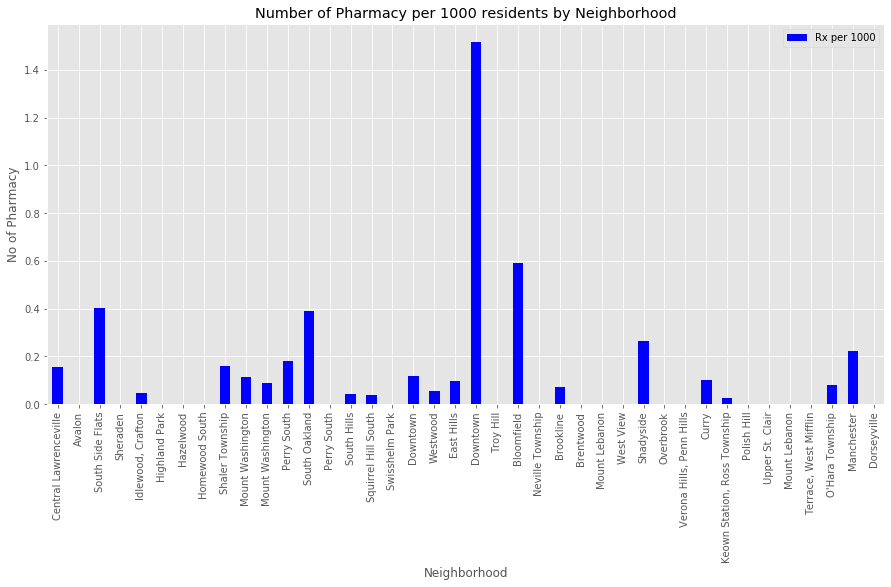

In [150]:
df_Rx_1000=df_merge_col2[['Neighborhood','Rx per 1000']]
df_Rx_1000.set_index('Neighborhood', inplace=True)

df_Rx_1000.plot(kind='bar', figsize=(15, 7), color='blue')

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('No of Pharmacy') # add y-label to the plot
plt.title('Number of Pharmacy per 1000 residents by Neighborhood') # add title to the plot

plt.show()


The chart above shows that the Downtown area has the highest number of Pharmacy per 1000. This is expected as a lot of pedestrian and business traffic in the downtown area. However we could also see that some neighborhoods has no pharmacy. Let's view a list of such zip codes. 

In [193]:
df_0_Rx=df_merge_col2[df_merge_col2['No of Pharmacy']==0]
df_0_Rx.reset_index(inplace=False)
df_0_Rx

Zip              Neighborhood  Population  Zip Latitude  Zip Longitude  \
0   15202                    Avalon     19685.0     40.504372     -80.068669   
1   15204                  Sheraden      8329.0     40.453975     -80.048480   
2   15206             Highland Park     28615.0     40.469024     -79.918001   
3   15207                 Hazelwood     11268.0     40.403712     -79.943156   
4   15208            Homewood South     10406.0     40.453469     -79.898948   
5   15214               Perry South     14352.0     40.467230     -80.007599   
6   15218            Swisshelm Park     13851.0     40.418851     -79.904163   
7   15223                 Troy Hill      7236.0     40.455741     -79.991948   
8   15225          Neville Township      1084.0     40.512740     -80.133267   
9   15227                 Brentwood     28156.0     40.376926     -79.975289   
10  15228             Mount Lebanon     17595.0     40.376656     -80.036236   
11  15229                 West View     13825.0     40.523872     -80.029437   
12  15234                 Overbrook     14056.0     40.381049     -79.994526   
13  15235  Verona Hills, Penn Hills     34580.0     40.477819     -79.810125   
14  15239               Polish Hill     21024.0     40.459286     -79.965440   
15  15241           Upper St. Clair     20395.0     40.335215     -80.073237   
16  15243             Mount Lebanon     13406.0     40.374832     -80.072669   
17  15122     Terrace, West Mifflin     20131.0     40.389359     -79.884527   
18  15238               Dorseyville     13162.0     40.558855     -79.913733   

    2017 Overdose  No of Pharmacy  Rx per 1000  OD per 1000  
0              12               0          0.0     0.609601  
1               7               0          0.0     0.840437  
2              20               0          0.0     0.698934  
3               9               0          0.0     0.798722  
4               7               0          0.0     0.672689  
5               8               0          0.0     0.557414  
6               6               0          0.0     0.433182  
7               4               0          0.0     0.552792  
8               2               0          0.0     1.845018  
9              26               0          0.0     0.923427  
10              1               0          0.0     0.056834  
11              9               0          0.0     0.650995  
12              8               0          0.0     0.569152  
13             21               0          0.0     0.607287  
14              2               0          0.0     0.095129  
15              1               0          0.0     0.049032  
16              3               0          0.0     0.223780  
17             13               0          0.0     0.645770  
18              4               0          0.0     0.303905

### 4.3 Opioid Overdose Cases 2017 per 1000

Current efforts to manage the opioid crisis have prompted a re-evaluation of many of the existing roles in the healthcare system, in order to maximize their individual effects on reducing opioid-associated morbidity and preventing overdose deaths. Bach, P., Hartung, D.

Here for awareness and context purpose, we will be viewing the heat map of 2017 opioid cases as well as calculate OD rate per 1000 for the neighborhoods.


Loading geojson file for heat mapping

In [112]:
pitt_geo = r"C:\Users\Olawale\Desktop\IBM Data Science\Allegheny_County_Zip_Code_Boundaries.geojson"# geojson file

In [151]:
pitt_map = folium.Map(location=[latitude, longitude], zoom_start=11)

df_merge_col_rst=df_merge_col.reset_index()

pitt_map.choropleth(
    geo_data=pitt_geo,
    data=df_merge_col_rst,
    columns=['Zip', '2017 Overdose'],
    key_on='feature.properties.ZIP', #Always use feature
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Opioid Overdose in Pittsburgh 2017'
)

for lat, lng, nebor in zip(pitts_neborhood['Zip Latitude'], pitts_neborhood['Zip Longitude'], 
                                           pitts_neborhood['Neighborhood']):
    label = '{}'.format(nebor)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(pitt_map)  
    

# display map
pitt_map


Let's view top 15 neighborhood with highest OD rate per 1000

In [173]:
df_OD=df_merge_col2[['Neighborhood', 'OD per 1000']]
df_OD.set_index('Neighborhood', inplace=True)
df_OD.sort_values(by='OD per 1000', ascending=True, inplace=True)

C:\Users\Olawale\Anaconda3\Lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [174]:
df_OD_top15=df_OD.tail(15)
df_OD_top15

OD per 1000
Neighborhood                      
Central Lawrenceville     0.786596
Bloomfield                0.788877
Hazelwood                 0.798722
Downtown                  0.838524
Sheraden                  0.840437
South Hills               0.899358
Mount Washington          0.902446
Idlewood, Crafton         0.914704
Brentwood                 0.923427
Brookline                 0.930299
South Side Flats          1.105639
Mount Washington          1.232951
Perry South               1.362251
Neville Township          1.845018
Downtown                  3.339405

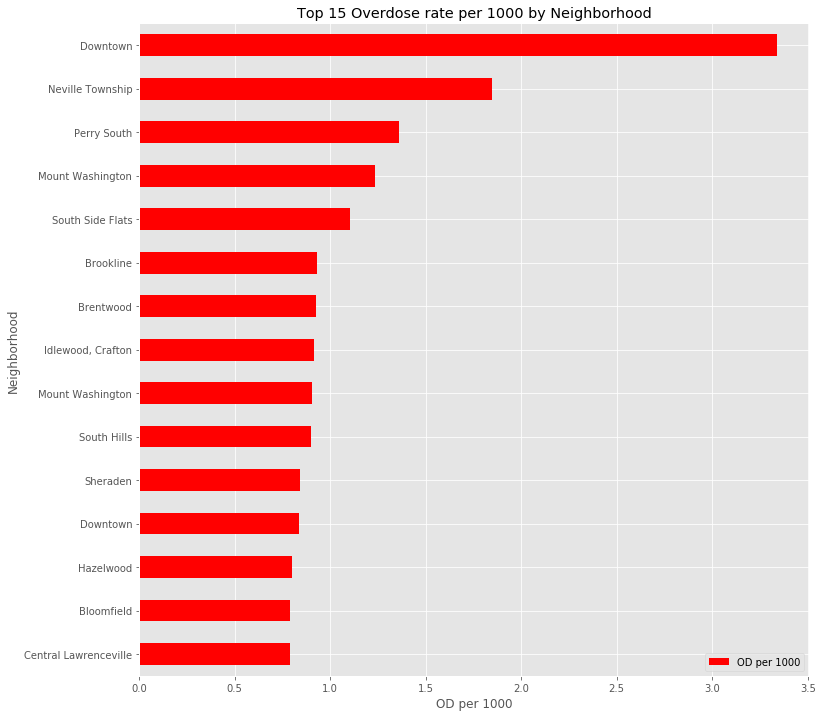

In [194]:
df_OD_top15.plot(kind='barh', figsize=(12, 12), color='red')
plt.xlabel('OD per 1000')
plt.title('Top 15 Overdose rate per 1000 by Neighborhood')



# annotate value labels to each country
#for index, value in enumerate(df_OD_top15): 
#    label = value # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
#    plt.annotate(label, xy=(value, index), color='white')


plt.show()

Let's view both Pharmacy per 1000 and OD per 1000

In [185]:
df_Rx_Op=df_merge_col2[['Neighborhood','Rx per 1000', 'OD per 1000']]
df_Rx_Op=df_Rx_Op.sort_values(by='Rx per 1000', ascending=False)
df_Rx_Op.set_index('Neighborhood', inplace=True)

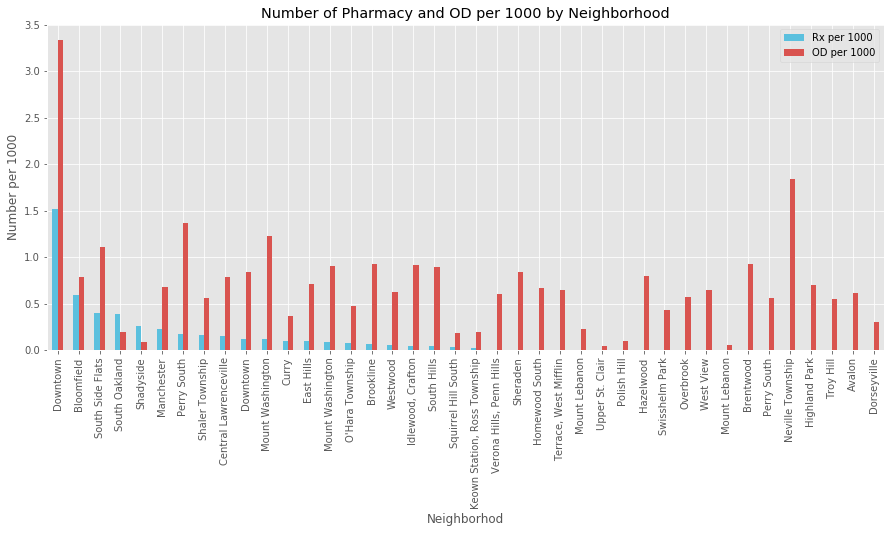

In [187]:
df_Rx_Op.plot(kind='bar', figsize=(15, 6), color=['#5bc0de','#d9534f'])

plt.xlabel('Neighborhod') # add to x-label to the plot
plt.ylabel('Number per 1000') # add y-label to the plot
plt.title('Number of Pharmacy and OD per 1000 by Neighborhood') # add title to the plot

plt.show()

### 4.4 Explore Neighborhoods

##### Using Foursquare API to explore the neighborhoods

In [195]:
# The code was removed by Watson Studio for sharing.

CLIENT_ID, CLIENT_SECRET & VERSION Processed


##### Exploring all venues in Pittsburgh Neighborhood

In [199]:
LIMIT=100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
       
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            pass
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            #v['venue']['location']['postalCode'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category']
    
    return(nearby_venues)

Creating a new dataframe pitts_venues

In [200]:
pitts_venues = getNearbyVenues(names=pitts_neborhood['Zip'],
                                   latitudes=pitts_neborhood['Zip Latitude'],
                                   longitudes=pitts_neborhood['Zip Longitude'])

15201
15202
15203
15204
15205
15206
15207
15208
15209
15210
15211
15212
15213
15214
15216
15217
15218
15219
15220
15221
15222
15223
15224
15225
15226
15227
15228
15229
15232
15234
15235
15236
15237
15239
15241
15243
15122
15215
15233
15238


Viewing the new dataframe

In [201]:
print(pitts_venues.shape)
pitts_venues.head()

(559, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         15201              40.474255               -79.95441   
1         15201              40.474255               -79.95441   
2         15201              40.474255               -79.95441   
3         15201              40.474255               -79.95441   
4         15201              40.474255               -79.95441   

                    Venue  Venue Latitude  Venue Longitude  \
0  The Abbey on Butler St       40.473754       -79.958368   
1   La Gourmandine Bakery       40.472994       -79.958723   
2      Roundabout Brewery       40.477149       -79.957030   
3  Stinky's Bar and Grill       40.477589       -79.957693   
4            Bahn Mi & Ti       40.472234       -79.959150   

          Venue Category  
0             Restaurant  
1                 Bakery  
2                Brewery  
3                    Bar  
4  Vietnamese Restaurant

Viewing number of venues per each zip code

In [202]:
pitts_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                         
15122                             5                       5      5   
15201                            12                      12     12   
15202                             6                       6      6   
15203                            51                      51     51   
15204                             3                       3      3   
15205                             3                       3      3   
15206                             4                       4      4   
15207                             3                       3      3   
15208                             9                       9      9   
15209                             8                       8      8   
15210                             3                       3      3   
15211                             4                       4      4   
15212                             5                       5      5   
15213                             4                       4      4   
15214                             5                       5      5   
15215                             1                       1      1   
15216                            29                      29     29   
15217                            36                      36     36   
15218                             2                       2      2   
15219                            62                      62     62   
15220                             2                       2      2   
15221                             3                       3      3   
15222                           100                     100    100   
15223                            11                      11     11   
15224                            35                      35     35   
15225                             4                       4      4   
15226                            21                      21     21   
15227                             6                       6      6   
15228                            13                      13     13   
15229                             9                       9      9   
15232                            37                      37     37   
15233                             4                       4      4   
15234                             5                       5      5   
15235                             1                       1      1   
15236                             9                       9      9   
15237                            23                      23     23   
15238                             1                       1      1   
15239                            16                      16     16   
15241                             3                       3      3   
15243                             1                       1      1   

              Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                   
15122                      5                5               5  
15201                     12               12              12  
15202                      6                6               6  
15203                     51               51              51  
15204                      3                3               3  
15205                      3                3               3  
15206                      4                4               4  
15207                      3                3               3  
15208                      9                9               9  
15209                      8                8               8  
15210                      3                3               3  
15211                      4                4               4  
15212                      5                5               5  
15213                      4                4               4  
15214                      5                5    

Let's analyze each neighborhood

In [203]:
# one hot encoding
pitts_onehot = pd.get_dummies(pitts_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
pitts_onehot['Neighborhood'] = pitts_venues['Neighborhood'] 


pitts_onehot.head()

ATM  Accessories Store  American Restaurant  Arcade  Art Gallery  \
0    0                  0                    0       0            0   
1    0                  0                    0       0            0   
2    0                  0                    0       0            0   
3    0                  0                    0       0            0   
4    0                  0                    0       0            0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  BBQ Joint  \
0                    0                 0                   0          0   
1                    0                 0                   0          0   
2                    0                 0                   0          0   
3                    0                 0                   0          0   
4                    0                 0                   0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Basketball Court  \
0           0       0     0    0               0                 0   
1           0       1     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    1               0                 0   
4           0       0     0    0               0                 0   

   Beer Garden  Beer Store  Bike Shop  Bistro  Bookstore  Boutique  \
0            0           0          0       0          0         0   
1            0           0          0       0          0         0   
2            0           0          0       0          0         0   
3            0           0          0       0          0         0   
4            0           0          0       0          0         0   

   Bowling Alley  Breakfast Spot  Brewery  Bridal Shop  Burger Joint  \
0              0               0        0            0             0   
1              0               0        0            0             0   
2              0               0        1            0             0   
3              0               0        0            0             0   
4              0               0        0            0             0   

   Bus Station  Bus Stop  Café  Cajun / Creole Restaurant  Candy Store  \
0            0         0     0                          0            0   
1            0         0     0                          0            0   
2            0         0     0                          0            0   
3            0         0     0                          0            0   
4            0         0     0                          0            0   

   Chinese Restaurant  Climbing Gym  Clothing Store  Cocktail Bar  \
0                   0             0               0             0   
1                   0             0               0             0   
2                   0             0               0             0   
3                   0             0               0             0   
4                   0             0               0             0   

   Coffee Shop  Comfort Food Restaurant  Concert Hall  \
0            0                        0             0   
1            0                        0             0   
2            0                        0             0   
3            0                        0             0   
4            0                        0             0   

   Construction & Landscaping  Convenience Store  Cosmetics Shop  \
0                           0                  0               0   
1                           0                  0               0   
2                           0                  0               0   
3                           0                  0               0   
4                           0                  0               0   

   Cycle Studio  Deli / Bodega  Department Store  Diner  Discount Store  \
0             0              0                 0      0               0   
1             0              0                 0      0               0   
2            

##### Examining the new dataframe

In [204]:
pitts_onehot.shape

(559, 162)

##### Grouping each venues into neighborhoods and examining mean of each occurrence

In [205]:
pitts_grouped = pitts_onehot.groupby('Neighborhood').mean().reset_index()
pitts_grouped

Neighborhood       ATM  Accessories Store  American Restaurant    Arcade  \
0          15122  0.000000           0.000000             0.000000  0.000000   
1          15201  0.000000           0.000000             0.000000  0.000000   
2          15202  0.166667           0.000000             0.000000  0.000000   
3          15203  0.000000           0.019608             0.039216  0.000000   
4          15204  0.000000           0.000000             0.000000  0.000000   
5          15205  0.000000           0.000000             0.000000  0.000000   
6          15206  0.000000           0.000000             0.000000  0.000000   
7          15207  0.000000           0.000000             0.000000  0.000000   
8          15208  0.000000           0.000000             0.000000  0.000000   
9          15209  0.000000           0.000000             0.000000  0.000000   
10         15210  0.000000           0.000000             0.000000  0.000000   
11         15211  0.000000           0.000000             0.250000  0.000000   
12         15212  0.000000           0.000000             0.000000  0.000000   
13         15213  0.000000           0.000000             0.000000  0.000000   
14         15214  0.000000           0.000000             0.000000  0.000000   
15         15215  0.000000           0.000000             0.000000  0.000000   
16         15216  0.000000           0.000000             0.034483  0.000000   
17         15217  0.000000           0.000000             0.027778  0.000000   
18         15218  0.000000           0.000000             0.000000  0.000000   
19         15219  0.000000           0.000000             0.064516  0.000000   
20         15220  0.000000           0.000000             0.000000  0.000000   
21         15221  0.000000           0.000000             0.000000  0.000000   
22         15222  0.000000           0.000000             0.050000  0.000000   
23         15223  0.000000           0.000000             0.181818  0.000000   
24         15224  0.000000           0.000000             0.000000  0.000000   
25         15225  0.000000           0.000000             0.000000  0.000000   
26         15226  0.000000           0.000000             0.000000  0.000000   
27         15227  0.000000           0.000000             0.000000  0.000000   
28         15228  0.000000           0.000000             0.076923  0.000000   
29         15229  0.000000           0.000000             0.000000  0.000000   
30         15232  0.000000           0.000000             0.000000  0.000000   
31         15233  0.000000           0.000000             0.000000  0.000000   
32         15234  0.000000           0.000000             0.000000  0.000000   
33         15235  0.000000           0.000000             0.000000  0.000000   
34         15236  0.000000           0.000000             0.000000  0.000000   
35         15237  0.000000           0.043478             0.000000  0.043478   
36         15238  0.000000           0.000000             0.000000  0.000000   
37         15239  0.000000           0.000000             0.000000  0.000000   
38         15241  0.000000           0.000000             0.000000  0.000000   
39         15243  0.000000           0.000000             0.000000  0.000000   

    Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0      0.000000             0.000000          0.000000            0.000000   
1      0.000000             0.000000          0.083333            0.000000   
2      0.000000             0.000000          0.000000            0.000000   
3      0.000000             0.000000          0.019608            0.000000   
4      0.000000             0.000000          0.000000            0.000000   
5      0.000000             0.000000          0.000000            0.000000   
6      0.250000             0.000000          0.000000            0.000000   
7      0.000000             0.000000          0.000000            0.000000   
8      0.000000      

#### Exploring top 10 venue for each neighborhood

In [206]:
# write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [207]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = pitts_grouped['Neighborhood']

for ind in np.arange(pitts_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pitts_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood       1st Most Common Venue  2nd Most Common Venue  \
0          15122                   Bookstore            Pizza Place   
1          15201                         Bar                 Bakery   
2          15202                 Pizza Place                    ATM   
3          15203              Clothing Store                    Bar   
4          15204         Fried Chicken Joint                    Gym   
5          15205                 Coffee Shop         Discount Store   
6          15206                 High School            Art Gallery   
7          15207           Convenience Store        Vacation Rental   
8          15208                        Food   Gym / Fitness Center   
9          15209  Construction & Landscaping            Pizza Place   
10         15210                         Bar     Italian Restaurant   
11         15211                        Pool         Breakfast Spot   
12         15212                   Bookstore          Grocery Store   
13         15213                       Trail            Flower Shop   
14         15214                   Bookstore          Grocery Store   
15         15215                        Pool         Cosmetics Shop   
16         15216                 Pizza Place     Chinese Restaurant   
17         15217                 Pizza Place            Coffee Shop   
18         15218            Department Store             Playground   
19         15219              Sandwich Place                  Hotel   
20         15220              Baseball Field  Performing Arts Venue   
21         15221                   Speakeasy         Discount Store   
22         15222                 Coffee Shop                  Hotel   
23         15223         American Restaurant                Theater   
24         15224                 Coffee Shop                    Bar   
25         15225         Sporting Goods Shop        Harbor / Marina   
26         15226          Italian Restaurant              BBQ Joint   
27         15227                 Candy Store            Pizza Place   
28         15228                 Yoga Studio                    Spa   
29         15229                 Pizza Place                 Bakery   
30         15232              Clothing Store            Coffee Shop   
31         15233                   Bike Shop            Coffee Shop   
32         15234                         Bar    Rental Car Location   
33         15235                      Bakery            Yoga Studio   
34         15236           Convenience Store          Grocery Store   
35         15237              Clothing Store         Massage Studio   
36         15238               Movie Theater            Yoga Studio   
37         15239                    Dive Bar     Italian Restaurant   
38         15241                  Playground                   Park   
39         15243                    Pharmacy            Yoga Studio   

   3rd Most Common Venue  4th Most Common Venue   5th Most Common Venue  \
0         Shop & Service       Basketball Court                     Bar   
1                  Diner  Vietnamese Restaurant                     Pub   
2     Italian Restaurant                   Pool       Convenience Store   
3     Mexican Restaurant               Dive Bar     American Restaurant   
4      Fish & Chips Shop            Yoga Studio     Dumpling Restaurant   
5                    Bar            Yoga Studio             Event Space   
6            Coffee Shop                Dog Run       Electronics Store   
7                    Bar      Electronics Store       Food & Drink Shop   
8            Bus Station    Arts & Crafts Store  Furniture / Home Store   
9            Video Store          Grocery Store          Ice Cream Shop   
10           Yoga Studio      Electronics Store       Food & Drink Shop   
11   American Restaurant                Brewery             Event Space   
12              Bus Stop            Golf Course          Scenic Lookout   
13              Dive Bar         Baseball 

### 4.5 Clustering Neighborhoods

Clustering is an example of an unsupervised machine learning technique while kmeans algorithm is one of the popular clustering algorithm used. We will be using the kmeans algorithm to cluster the Pittsburgh city neighborhoods. We will generate the best number of cluster to segment the neighborhoods into using the elbow method

In [208]:
#preparing the data set for analysis
pitts_grouped_clustering = pitts_grouped.drop('Neighborhood', 1)

Generating the best fit k for the kmeans algorithm using the elbow method

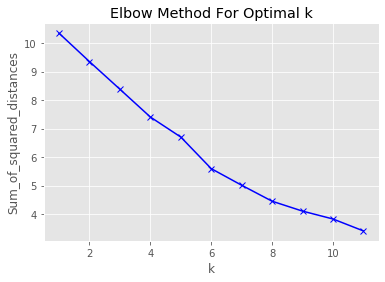

In [210]:
Sum_of_squared_distances = []
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pitts_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Using the kmeans algorithm to cluster the neighborhood

In [211]:
# set number of clusters
k = 6

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(pitts_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 1, 0, 0, 0, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [217]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

pitts_merged = pitts_neborhood

# merge pitts_grouped with pitts_data to add latitude/longitude for each neighborhood
pitts_merged = pitts_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Zip')

pitts_merged.head(20) # check the last columns!

Zip           Neighborhood  Population  Zip Latitude  Zip Longitude  \
0   15201  Central Lawrenceville     12713.0     40.474255     -79.954410   
1   15202                 Avalon     19685.0     40.504372     -80.068669   
2   15203       South Side Flats      9949.0     40.428778     -79.970191   
3   15204               Sheraden      8329.0     40.453975     -80.048480   
4   15205      Idlewood, Crafton     21865.0     40.433722     -80.071116   
5   15206          Highland Park     28615.0     40.469024     -79.918001   
6   15207              Hazelwood     11268.0     40.403712     -79.943156   
7   15208         Homewood South     10406.0     40.453469     -79.898948   
8   15209        Shaler Township     12438.0     40.496049     -79.976259   
9   15210       Mount Washington     25954.0     40.426241     -80.001133   
10  15211       Mount Washington     11081.0     40.431950     -80.016356   
11  15212            Perry South     27895.0     40.467441     -80.007818   
12  15213          South Oakland     30844.0     40.428233     -79.954500   
13  15214            Perry South     14352.0     40.467230     -80.007599   
14  15216            South Hills     23350.0     40.394852     -80.034795   
15  15217    Squirrel Hill South     27220.0     40.432834     -79.924886   
16  15218         Swisshelm Park     13851.0     40.418851     -79.904163   
17  15219               Downtown     16696.0     40.437113     -79.997846   
18  15220               Westwood     17718.0     40.437378     -80.044680   
19  15221             East Hills     31060.0     40.455212     -79.880098   

    2017 Overdose  No of Pharmacy  Rx per 1000  OD per 1000  Cluster Labels  \
0              10               2     0.157319     0.786596               3   
1              12               0     0.000000     0.609601               0   
2              11               4     0.402050     1.105639               0   
3               7               0     0.000000     0.840437               0   
4              20               1     0.045735     0.914704               3   
5              20               0     0.000000     0.698934               0   
6               9               0     0.000000     0.798722               3   
7               7               0     0.000000     0.672689               0   
8               7               2     0.160798     0.562791               0   
9              32               3     0.115589     1.232951               3   
10             10               1     0.090245     0.902446               0   
11             38               5     0.179244     1.362251               3   
12              6              12     0.389055     0.194527               0   
13              8               0     0.000000     0.557414               3   
14             21               1     0.042827     0.899358               0   
15              5               1     0.036738     0.183688               0   
16              6               0     0.000000     0.433182               0   
17             14               2     0.119789     0.838524               0   
18             11               1     0.056440     0.620838               0   
19             22               3     0.096587     0.708307               3   

         1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
0                          Bar                 Bakery                 Diner   
1                  Pizza Place                    ATM    Italian Restaurant   
2               Clothing Store                    Bar    Mexican Restaurant   
3          Fried Chicken Joint                    Gym     Fish & Chips Shop   
4                  Coffee Shop         Discount Store                   Bar   
5                  High School            Art Gallery           Coffee Shop   
6            Convenience Store        Vacation Rental                   Bar   
7                         Food   Gym / Fitness Center           Bus Station   
8   Construction 

#### Cleaning the dataframe and dropping redundant columns

In [218]:
pitts_merged2=pitts_merged.drop(['Zip', 'Population', '2017 Overdose', 'No of Pharmacy', 'OD per 1000'], axis=1)
#pitts_merged['Cluster Labels']=pitts_merged['Cluster Labels'].astype(int)
pitts_merged2.head(10)

Neighborhood  Zip Latitude  Zip Longitude  Rx per 1000  \
0  Central Lawrenceville     40.474255     -79.954410     0.157319   
1                 Avalon     40.504372     -80.068669     0.000000   
2       South Side Flats     40.428778     -79.970191     0.402050   
3               Sheraden     40.453975     -80.048480     0.000000   
4      Idlewood, Crafton     40.433722     -80.071116     0.045735   
5          Highland Park     40.469024     -79.918001     0.000000   
6              Hazelwood     40.403712     -79.943156     0.000000   
7         Homewood South     40.453469     -79.898948     0.000000   
8        Shaler Township     40.496049     -79.976259     0.160798   
9       Mount Washington     40.426241     -80.001133     0.115589   

   Cluster Labels       1st Most Common Venue 2nd Most Common Venue  \
0               3                         Bar                Bakery   
1               0                 Pizza Place                   ATM   
2               0              Clothing Store                   Bar   
3               0         Fried Chicken Joint                   Gym   
4               3                 Coffee Shop        Discount Store   
5               0                 High School           Art Gallery   
6               3           Convenience Store       Vacation Rental   
7               0                        Food  Gym / Fitness Center   
8               0  Construction & Landscaping           Pizza Place   
9               3                         Bar    Italian Restaurant   

  3rd Most Common Venue  4th Most Common Venue   5th Most Common Venue  \
0                 Diner  Vietnamese Restaurant                     Pub   
1    Italian Restaurant                   Pool       Convenience Store   
2    Mexican Restaurant               Dive Bar     American Restaurant   
3     Fish & Chips Shop            Yoga Studio     Dumpling Restaurant   
4                   Bar            Yoga Studio             Event Space   
5           Coffee Shop                Dog Run       Electronics Store   
6                   Bar      Electronics Store       Food & Drink Shop   
7           Bus Station    Arts & Crafts Store  Furniture / Home Store   
8           Video Store          Grocery Store          Ice Cream Shop   
9           Yoga Studio      Electronics Store       Food & Drink Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0              Bus Stop      Asian Restaurant             BBQ Joint   
1         Grocery Store      Greek Restaurant     Fish & Chips Shop   
2           Coffee Shop       Thai Restaurant          Climbing Gym   
3                  Food           Flower Shop  Fast Food Restaurant   
4     Food & Drink Shop                  Food           Flower Shop   
5     Food & Drink Shop                  Food           Flower Shop   
6                  Food           Flower Shop     Fish & Chips Shop   
7                  Café  Fast Food Restaurant                  Bank   
8  Fast Food Restaurant        Farmers Market        Baseball Field   
9                  Food           Flower Shop     Fish & Chips Shop   

  9th Most Common Venue 10th Most Common Venue  
0               Brewery             Restaurant  
1  Fast Food Restaurant         Farmers Market  
2    Seafood Restaurant            Snack Place  
3        Farmers Market            Event Space  
4     Fish & Chips Shop   Fast Food Restaurant  
5     Fish & Chips Shop   Fast Food Restaurant  
6  Fast Food Restaurant         Farmers Market  
7           Yoga Studio            Event Space  
8           Yoga Studio      Electronics Store  
9  Fast Food Restaurant         Farmers Market

# 5. Results

### 5.1 Viewing the Clusters on Map

In [223]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], tiles='Stamen Toner', zoom_start=11.5)


# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pitts_merged2['Zip Latitude'], pitts_merged2['Zip Longitude'], pitts_merged2['Neighborhood'], pitts_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 5.2 Examining the clusters

Cluster 1

In [225]:
pitts_merged2.loc[pitts_merged['Cluster Labels'] == 0, pitts_merged2.columns[[0] + list(range(5, pitts_merged2.shape[1]))]]

Neighborhood       1st Most Common Venue  \
1                         Avalon                 Pizza Place   
2               South Side Flats              Clothing Store   
3                       Sheraden         Fried Chicken Joint   
5                  Highland Park                 High School   
7                 Homewood South                        Food   
8                Shaler Township  Construction & Landscaping   
10              Mount Washington                        Pool   
12                 South Oakland                       Trail   
14                   South Hills                 Pizza Place   
15           Squirrel Hill South                 Pizza Place   
16                Swisshelm Park            Department Store   
17                      Downtown              Sandwich Place   
18                      Westwood              Baseball Field   
20                      Downtown                 Coffee Shop   
21                     Troy Hill         American Restaurant   
22                    Bloomfield                 Coffee Shop   
23              Neville Township         Sporting Goods Shop   
24                     Brookline          Italian Restaurant   
25                     Brentwood                 Candy Store   
26                 Mount Lebanon                 Yoga Studio   
27                     West View                 Pizza Place   
28                     Shadyside              Clothing Store   
32  Keown Station, Ross Township              Clothing Store   
33                   Polish Hill                    Dive Bar   
34               Upper St. Clair                  Playground   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1                     ATM    Italian Restaurant                  Pool   
2                     Bar    Mexican Restaurant              Dive Bar   
3                     Gym     Fish & Chips Shop           Yoga Studio   
5             Art Gallery           Coffee Shop               Dog Run   
7    Gym / Fitness Center           Bus Station   Arts & Crafts Store   
8             Pizza Place           Video Store         Grocery Store   
10         Breakfast Spot   American Restaurant               Brewery   
12            Flower Shop              Dive Bar        Baseball Field   
14     Chinese Restaurant                 Diner                   Bar   
15            Coffee Shop   Szechuan Restaurant              Tea Room   
16             Playground           Yoga Studio     Electronics Store   
17                  Hotel   American Restaurant    Seafood Restaurant   
18  Performing Arts Venue           Yoga Studio     Electronics Store   
20                  Hotel                   Bar        Sandwich Place   
21                Theater    Italian Restaurant                  Food   
22                    Bar           Pizza Place       Thai Restaurant   
23        Harbor / Marina        Sandwich Place           Gas Station   
24              BBQ Joint         Grocery Store                Bakery   
25            Pizza Place           Art Gallery    Athletics & Sports   
26                    Spa   American Restaurant   Arts & Crafts Store   
27                 Bakery     Convenience Store              Pharmacy   
28            Coffee Shop                   Gym                Bakery   
32         Massage Studio          Optical Shop             Pet Store   
33     Italian Restaurant     Food & Drink Shop           Record Shop   
34                   Park           Yoga Studio   Dumpling Restaurant   

     5th Most Common Venue       6th Most Common Venue  \
1        Convenience Store               Grocery Store   
2      American Restaurant                 Coffee Shop   
3      Dumpling Restaurant                        Food   
5        Electronics Store           Food & Drink Shop   
7   Furniture / Home Store                        Café   
8           Ice Cream Shop        Fast Food Restaurant   
10             Event Space           Food & Drink 

Cluster 2

In [226]:
pitts_merged2.loc[pitts_merged['Cluster Labels'] == 1, pitts_merged2.columns[[0] + list(range(5, pitts_merged2.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
37  O'Hara Township                  Pool        Cosmetics Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
37     Food & Drink Shop                  Food           Flower Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
37     Fish & Chips Shop  Fast Food Restaurant        Farmers Market   

   9th Most Common Venue 10th Most Common Venue  
37           Event Space      Electronics Store

Cluster 3

In [227]:
pitts_merged2.loc[pitts_merged['Cluster Labels'] == 2, pitts_merged2.columns[[0] + list(range(5, pitts_merged2.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
39  Dorseyville         Movie Theater           Yoga Studio   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
39        Cosmetics Shop     Food & Drink Shop                  Food   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
39           Flower Shop     Fish & Chips Shop  Fast Food Restaurant   

   9th Most Common Venue 10th Most Common Venue  
39        Farmers Market            Event Space

Cluster 4

In [228]:
pitts_merged2.loc[pitts_merged['Cluster Labels'] == 3, pitts_merged2.columns[[0] + list(range(5, pitts_merged2.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0   Central Lawrenceville                   Bar                Bakery   
4       Idlewood, Crafton           Coffee Shop        Discount Store   
6               Hazelwood     Convenience Store       Vacation Rental   
9        Mount Washington                   Bar    Italian Restaurant   
11            Perry South             Bookstore         Grocery Store   
13            Perry South             Bookstore         Grocery Store   
19             East Hills             Speakeasy        Discount Store   
29              Overbrook                   Bar   Rental Car Location   
31                  Curry     Convenience Store         Grocery Store   
36  Terrace, West Mifflin             Bookstore           Pizza Place   
38             Manchester             Bike Shop           Coffee Shop   

   3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0                  Diner  Vietnamese Restaurant                   Pub   
4                    Bar            Yoga Studio           Event Space   
6                    Bar      Electronics Store     Food & Drink Shop   
9            Yoga Studio      Electronics Store     Food & Drink Shop   
11              Bus Stop            Golf Course        Scenic Lookout   
13              Bus Stop            Golf Course        Scenic Lookout   
19                   Bar            Event Space            Food Court   
29        Ice Cream Shop               Pharmacy         Garden Center   
31           Pizza Place         Ice Cream Shop              Pharmacy   
36        Shop & Service       Basketball Court                   Bar   
38        Baseball Field                    Bar           Yoga Studio   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0               Bus Stop      Asian Restaurant             BBQ Joint   
4      Food & Drink Shop                  Food           Flower Shop   
6                   Food           Flower Shop     Fish & Chips Shop   
9                   Food           Flower Shop     Fish & Chips Shop   
11           Yoga Studio     Electronics Store           Flower Shop   
13           Yoga Studio     Electronics Store           Flower Shop   
19     Food & Drink Shop                  Food           Flower Shop   
29           Yoga Studio           Flower Shop     Fish & Chips Shop   
31                Bakery            Laundromat                   Bar   
36           Yoga Studio        Farmers Market                  Food   
38        Farmers Market     Food & Drink Shop                  Food   

   9th Most Common Venue 10th Most Common Venue  
0                Brewery             Restaurant  
4      Fish & Chips Shop   Fast Food Restaurant  
6   Fast Food Restaurant         Farmers Market  
9   Fast Food Restaurant         Farmers Market  
11     Fish & Chips Shop   Fast Food Restaurant  
13     Fish & Chips Shop   Fast Food Restaurant  
19     Fish & Chips Shop   Fast Food Restaurant  
29  Fast Food Restaurant         Farmers Market  
31        Baseball Field            Yoga Studio  
36           Flower Shop      Fish & Chips Shop  
38           Flower Shop      Fish & Chips Shop

Cluster 5

In [230]:
pitts_merged2.loc[pitts_merged['Cluster Labels'] == 4, pitts_merged2.columns[[0] + list(range(5, pitts_merged2.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
30  Verona Hills, Penn Hills                Bakery           Yoga Studio   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
30            Food Truck     Food & Drink Shop                  Food   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
30           Flower Shop     Fish & Chips Shop  Fast Food Restaurant   

   9th Most Common Venue 10th Most Common Venue  
30        Farmers Market            Event Space

Cluster 6

In [232]:
pitts_merged2.loc[pitts_merged['Cluster Labels'] == 5, pitts_merged2.columns[[0] + list(range(5, pitts_merged2.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
35  Mount Lebanon              Pharmacy           Yoga Studio   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
35     Electronics Store     Food & Drink Shop                  Food   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
35           Flower Shop     Fish & Chips Shop  Fast Food Restaurant   

   9th Most Common Venue 10th Most Common Venue  
35        Farmers Market            Event Space

#### Plotting Pharmacy and the neighborhood cluster on a map

In [238]:
#create map
map_clusters = folium.Map(location=[latitude, longitude], tiles='Stamen Toner', zoom_start=11.5)


# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []


for lat, lon, poi, cluster in zip(pitts_merged2['Zip Latitude'], pitts_merged2['Zip Longitude'], pitts_merged2['Neighborhood'], pitts_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


pharma = plugins.MarkerCluster().add_to(map_clusters)

# add markers to map
for lat, lng, venue in zip(pharmacy['latitude'], pharmacy['longitude'], 
                                            pharmacy['Pharmacy']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        icon=folium.Icon(color="blue",icon="info-sign"),
        #folium.Icon(color='red', icon="fa-prescription"),
        popup=label).add_to(pharma)  
       
        
        
map_clusters

# 6. Discussion

As mentioned earlier, the importance of pharmacy availability in a neighborhood and especially the Pittsburgh area cannot be over emphasized. To better understand and analyze Pittsburgh neighborhood and I calculated Pharmacy per 1000 persons I also calculated Overdose cases per 1000 persons. The Downtown area has the highest number of Pharmacy per 1000. This was expected as there a lot of pedestrian and business traffic in the downtown area. However, we could also see that some neighborhoods have no pharmacy.

An unsupervised machine learning algorithm, k-means algorithm was used to cluster the Pittsburgh city neighborhoods. I generated the best number of clusters to segment the neighborhoods into using the elbow method. For the clustering analysis, I created a new data table to house all the venues and venues category in each Pittsburgh neighborhood. The table has 559 rows (venues) and 7 columns. I created a data frame for top 10 common places of each neighborhood for a better view and understanding of each neighborhood.

I finished the study by visualizing the city of Pittsburgh neighborhood clustered into groups by colors based on their inherent similarities of common venues. For further analysis purpose, including the average distance between pharmacies and the centroid of each neighborhood will be of good interest. Also, it can be beneficial performing same analysis beyond Pittsburgh city boundary for the entire Allegheny county or the state of Pennsylvania.

# 7. Conclusion

The purpose of this project was to identify Pittsburgh city area suitable or with the needs of establishing a pharmacy with the intention of aiding stakeholders to highlight possible optimal location. In this study I performed unsupervised machine learning algorithm in clustering neighborhoods in pittsburgh using Foursquare location data to discover inherent similarities in the neighborhoods.

The final decision about the optimal location will be made by the stakeholders after taking into consideration other characteristics of each neighborhood in terms of avaialability of real estate, major road network, attractiveness, competition etc

## References

Bach, P., Hartung, D. Leveraging the role of community pharmacists in the prevention, surveillance, and treatment of opioid use disorders. Addict Sci Clin Pract 14, 30 (2019). https://doi.org/10.1186/s13722-019-0158-0

AmerisourceBergen. Independence Can’t Be Stopped: How Retail Trends Are Changing  the Pharmacy Game

Mueller. Rural Pharmacies are closing, where does that leave patients. https://health.usnews.com/health-care/patient-advice/articles/2018-10-17/rural-pharmacies-are-closing-where-does-that-leave-patients

Dima Qato, an assistant professor in the department of pharmacy systems, outcomes and policy at the University of Illinois at Chicago, 
https://www.chicagotribune.com/news/breaking/ct-met-pharmacy-deserts-chicago-20180108-story.html

'Zip-codes.com'  https://www.zip-codes.com/city/pa-pittsburgh.asp#zipcodes

Wikipedia: https://en.wikipedia.org/wiki/Pittsburgh

John Nosta. Fixing Healthcare can be as close as your neighborhood. https://www.forbes.com/sites/johnnosta/2014/04/10/fixing-healthcare-can-be-as-close-as-your-neighborhood-pharmacy/#39b3873de910